In [99]:
#import all of the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplfinance as mpf # Note: mpl_finance is deprecated; Use 'pip install --upgrade mplfinance'
import numpy as np

In [101]:
# Import the csv
df_main = pd.read_csv('MVR.csv')

#Stock Prices of MasterCard and Visa (2008-2024)
#Source: https://www.kaggle.com/datasets/ranatalha71/stock-prices-of-mastercard-and-visa-2008-2024

In [103]:
# Check of there are empty cells
df_main.isnull().sum()

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64

In [105]:
# Check if there are duplicates
df_main.nunique()

Date           4047
Open_M         3769
High_M         3813
Low_M          3842
Close_M        3861
Adj Close_M    3982
Volume_M       3917
Open_V         3662
High_V         3702
Low_V          3693
Close_V        3733
Adj Close_V    3947
Volume_V       3976
dtype: int64

In [107]:
# Get the column names 
columns_mastercard = ['Date', 'Open_M', 'High_M', 'Low_M', 'Close_M', 'Adj Close_M', 'Volume_M']
columns_visa = ['Date', 'Open_V', 'High_V', 'Low_V', 'Close_V', 'Adj Close_V', 'Volume_V']
new_columns = ['Date','Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 'Adjusted Closing', 'Volume']

In [109]:
# Create the dataframes for each company
company_mastercard = pd.DataFrame(columns = new_columns)
company_visa = pd.DataFrame(columns = new_columns)

In [111]:
# Equate the columns for each company
company_mastercard[new_columns] = df_main[columns_mastercard]
company_visa[new_columns] = df_main[columns_visa]

In [113]:
# Check the info of mastercard
company_mastercard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4047 non-null   object 
 1   Opening Price     4047 non-null   float64
 2   Highest Price     4047 non-null   float64
 3   Lowest Price      4047 non-null   float64
 4   Closing Price     4047 non-null   float64
 5   Adjusted Closing  4047 non-null   float64
 6   Volume            4047 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.4+ KB


In [115]:
# Check the info of visa
company_visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4047 non-null   object 
 1   Opening Price     4047 non-null   float64
 2   Highest Price     4047 non-null   float64
 3   Lowest Price      4047 non-null   float64
 4   Closing Price     4047 non-null   float64
 5   Adjusted Closing  4047 non-null   float64
 6   Volume            4047 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.4+ KB


In [117]:
# Convert the 'Date' columns of both DFs to datetime
company_mastercard['Date'] = pd.to_datetime(company_mastercard['Date'], format='%Y-%m-%d')
company_visa['Date'] = pd.to_datetime(company_visa['Date'], format='%Y-%m-%d')

# Create new columns for years, months, and DayOfWeek
company_mastercard['Year'] = company_mastercard['Date'].dt.year
company_mastercard['Month'] = company_mastercard['Date'].dt.month
company_visa['Year'] = company_visa['Date'].dt.year
company_visa['Month'] = company_visa['Date'].dt.month

# Creating a column for the Day of the Week using dt.day_name() will cause a problem when creating a heatmap because it is a string
#weekday (Monday = 0; Sunday = 6)
company_mastercard['DayOfWeek_int'] = company_mastercard['Date'].dt.weekday
company_visa['DayOfWeek_int'] = company_visa['Date'].dt.weekday

# The float types are fine for plotting

In [119]:
# Show most of the aggregate functions for Mastercard
company_mastercard.describe()

,Date,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing,Volume,Year,Month,DayOfWeek_int
count,4047,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000
mean,2016-06-13 01:47:48.791697408,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,2015.947863,6.543860,2.022486
min,2008-06-02 00:00:00,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,2008.000000,1.000000,0.000000
25%,2012-06-05 12:00:00,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,2012.000000,4.000000,1.000000
50%,2016-06-14 00:00:00,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,2016.000000,7.000000,2.000000
75%,2020-06-20 12:00:00,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,2020.000000,10.000000,3.000000
max,2024-06-28 00:00:00,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,2024.000000,12.000000,4.000000
std,NaN,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,4.660124,3.418277,1.398657


In [121]:
# Show most of the aggregate functions for Mastercard
company_visa.describe()

,Date,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing,Volume,Year,Month,DayOfWeek_int
count,4047,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000
mean,2016-06-13 01:47:48.791697408,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07,2015.947863,6.543860,2.022486
min,2008-06-02 00:00:00,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06,2008.000000,1.000000,0.000000
25%,2012-06-05 12:00:00,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06,2012.000000,4.000000,1.000000
50%,2016-06-14 00:00:00,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06,2016.000000,7.000000,2.000000
75%,2020-06-20 12:00:00,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07,2020.000000,10.000000,3.000000
max,2024-06-28 00:00:00,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08,2024.000000,12.000000,4.000000
std,NaN,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07,4.660124,3.418277,1.398657


In [123]:
#resize the charts before creating the heatchart
plt.rcParams['figure.figsize'] = [12, 6] # Resize the figure so that charts can fit better

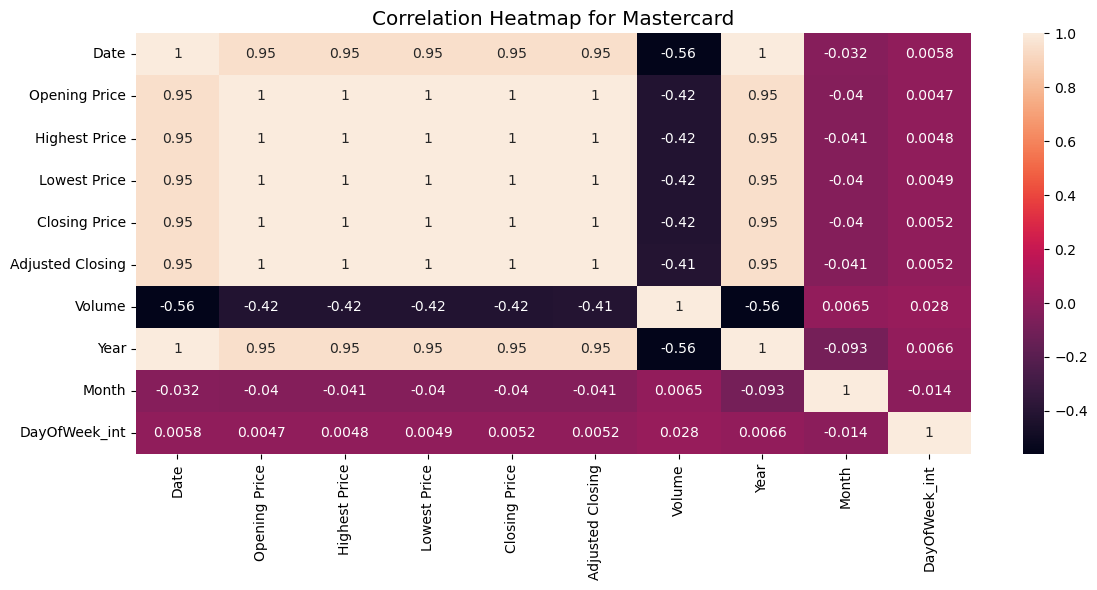

In [125]:
# Create a correlation heatmap for Mastercard and create an image
# NOTE: file is saved in the current work directory by default; Add the location if needed in savefig (i.e. 'D:\Downloads\file.png')
plt.title('Correlation Heatmap for Mastercard')
sns.heatmap(company_mastercard.corr(), annot=True)

plt.tight_layout() # Make sure that the labels are not 'out of frame'
plt.savefig('correlation heatmap mastercard.png')
plt.show() # NOTE: resets the plotting figure. Create the file first

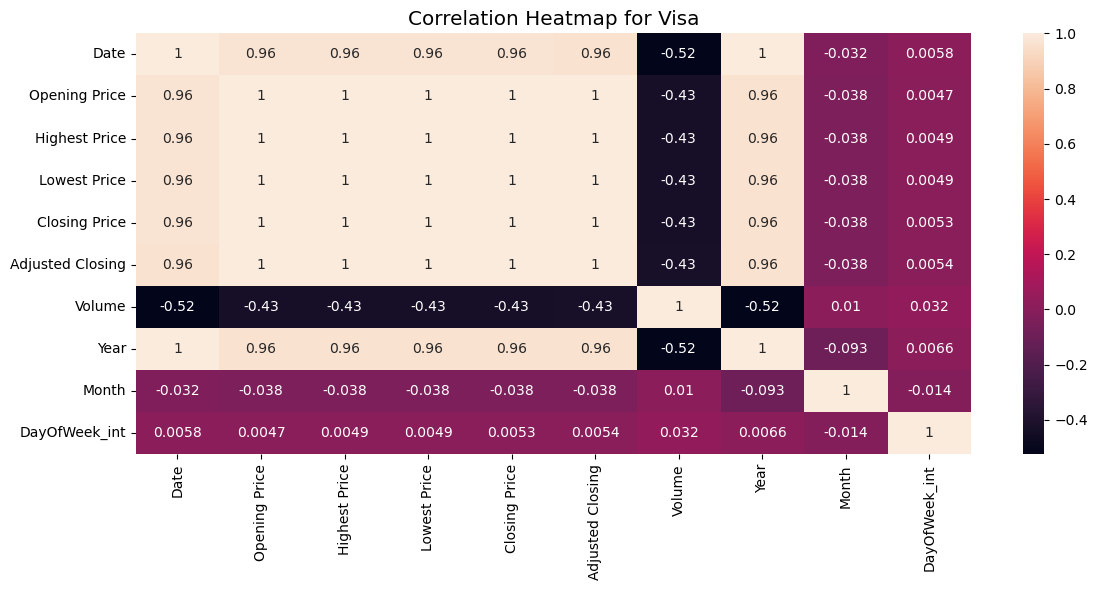

In [126]:
# Create a correlation heatmap for Visa and create an image
# NOTE: file is saved in the current work directory by default; Add the location if needed in savefig (i.e. 'D:\Downloads\file.png')

plt.title('Correlation Heatmap for Visa')
sns.heatmap(company_visa.corr(), annot=True)

plt.tight_layout() # Make sure that the labels are not cut off from the chart
plt.savefig('correlation heatmap visa.png')
plt.show() # NOTE: resets the plotting figure. Create the file first

In [127]:
# Create new columns for the Day of the week
# It's just much easier way to read than 0-6
company_mastercard['DayOfWeek'] = company_mastercard['Date'].dt.day_name()
company_visa['DayOfWeek'] = company_visa['Date'].dt.day_name()

In [128]:
# Find a style (theme) that works
print(plt.style.available)
# Use the style
plt.style.use('seaborn-v0_8-white')
# NOTE: styles don't work in heatmaps

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [129]:
# Set up a list of columns to plot - will be used often
general_columns_to_plot = ['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 'Adjusted Closing']

In [130]:
company_mastercard.groupby(['Year'])[general_columns_to_plot].mean()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing
Year,,,,,
2008,20.516604,21.068691,19.855604,20.451255,18.885446
2009,18.750647,19.068484,18.458913,18.784278,17.401726
2010,22.950921,23.237873,22.631413,22.926861,21.296230
2011,29.805694,30.231377,29.437036,29.850024,27.797790
2012,43.076644,43.508808,42.685000,43.106424,40.228783
2013,61.271020,61.747853,60.821036,61.320659,57.413418
2014,77.611234,78.249044,76.888913,77.554885,72.968334
2015,92.675318,93.417103,91.852738,92.664008,87.781633
2016,95.827540,96.594365,95.122738,95.881508,91.530716


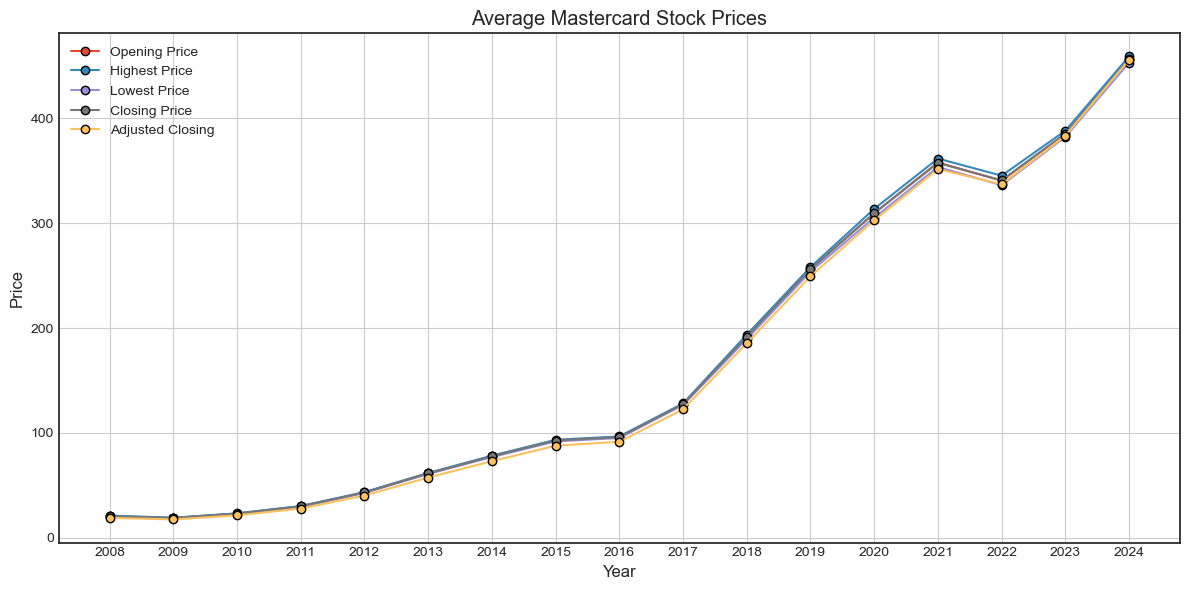

In [132]:
# Plot each column as a separate line
for column in general_columns_to_plot:
    grouped_mean = company_mastercard.groupby(['Year'])[column].mean()
    plt.plot(grouped_mean.index, grouped_mean.values, marker='o', label=column)

plt.title('Average Mastercard Stock Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(grouped_mean.index)  # Set x-axis ticks to be the years
plt.ticklabel_format(useOffset=False)  # Disable scientific notation
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('Average Mastercard Stock Prices.png')
plt.show()

In [133]:
company_visa.groupby(['Year'])[general_columns_to_plot].mean()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing
Year,,,,,
2008,16.313809,16.730956,15.877315,16.315302,14.577544
2009,16.451577,16.725992,16.214831,16.483482,14.817416
2010,19.839980,20.063780,19.575327,19.808155,17.910442
2011,20.675823,20.939911,20.464345,20.715000,18.875221
2012,31.365300,31.655330,31.119010,31.407820,28.843283
2013,45.098343,45.476736,44.747252,45.123720,41.771098
2014,55.463075,55.870883,55.045863,55.457222,51.723532
2015,70.778869,71.351776,70.113492,70.750139,66.476267
2016,77.900159,78.491508,77.299762,77.903294,73.718196


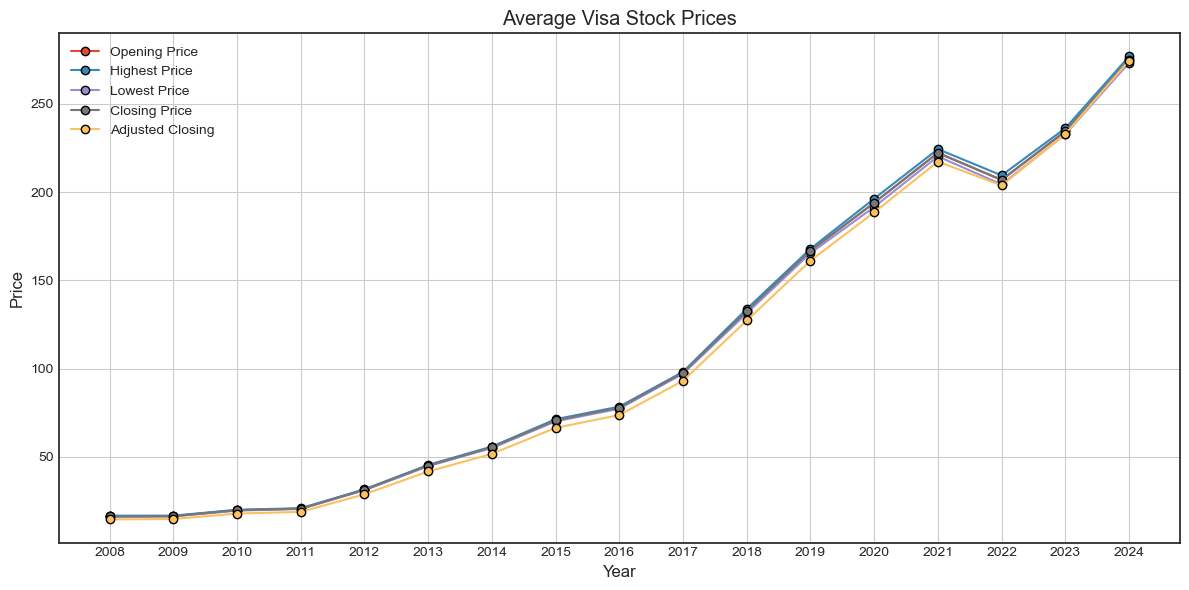

In [134]:
# Plot each column as a separate line
for column in general_columns_to_plot:
    grouped_mean = company_visa.groupby(['Year'])[column].mean()
    plt.plot(grouped_mean.index, grouped_mean.values, marker='o', label=column)

plt.title('Average Visa Stock Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(grouped_mean.index)  # Set x-axis ticks to be the years with rotation
plt.ticklabel_format(useOffset=False)  # Disable scientific notation
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('Average Visa Stock Prices.png')
plt.show()

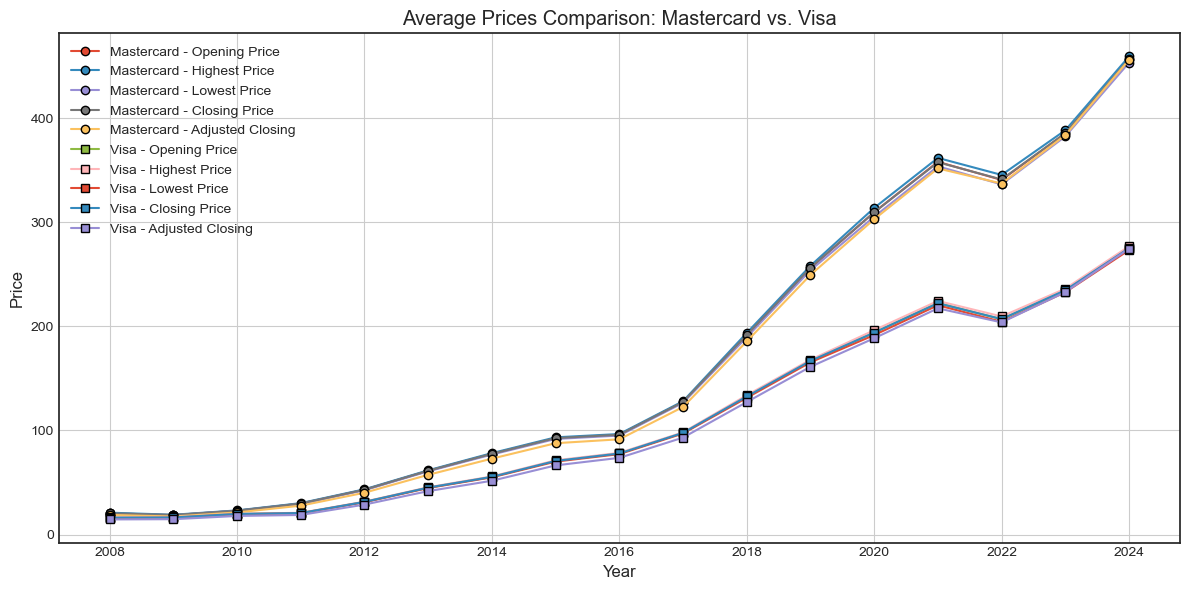

In [135]:
# Plotting lines for Mastercard
for column in general_columns_to_plot:
    plt.plot(company_mastercard.groupby(['Year'])[column].mean().index,
             company_mastercard.groupby(['Year'])[column].mean(),
             marker='o', label=f'Mastercard - {column}')

# Plotting lines for Visa
for column in general_columns_to_plot:
    plt.plot(company_visa.groupby(['Year'])[column].mean().index,
             company_visa.groupby(['Year'])[column].mean(),
             marker='s', label=f'Visa - {column}')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Prices Comparison: Mastercard vs. Visa')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('Average Stock Prices.png')
plt.show()

In [136]:
company_mastercard.groupby(['Month'])[general_columns_to_plot].mean()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing
Month,,,,,
1,168.831780,170.632279,167.109449,168.969465,165.072778
2,173.387857,175.342346,171.757551,173.747887,169.820481
3,170.229667,172.309960,168.152034,170.213231,166.292720
4,174.038030,175.805584,172.357625,174.060375,170.251096
5,176.951035,178.491180,175.124787,176.873159,173.024978
6,166.440526,167.878064,164.752311,166.283518,162.458171
7,153.726329,155.188177,152.293316,153.959210,149.979664
8,158.684596,160.051785,157.317053,158.795040,154.799237
9,156.893323,158.254534,155.235875,156.626985,152.611249


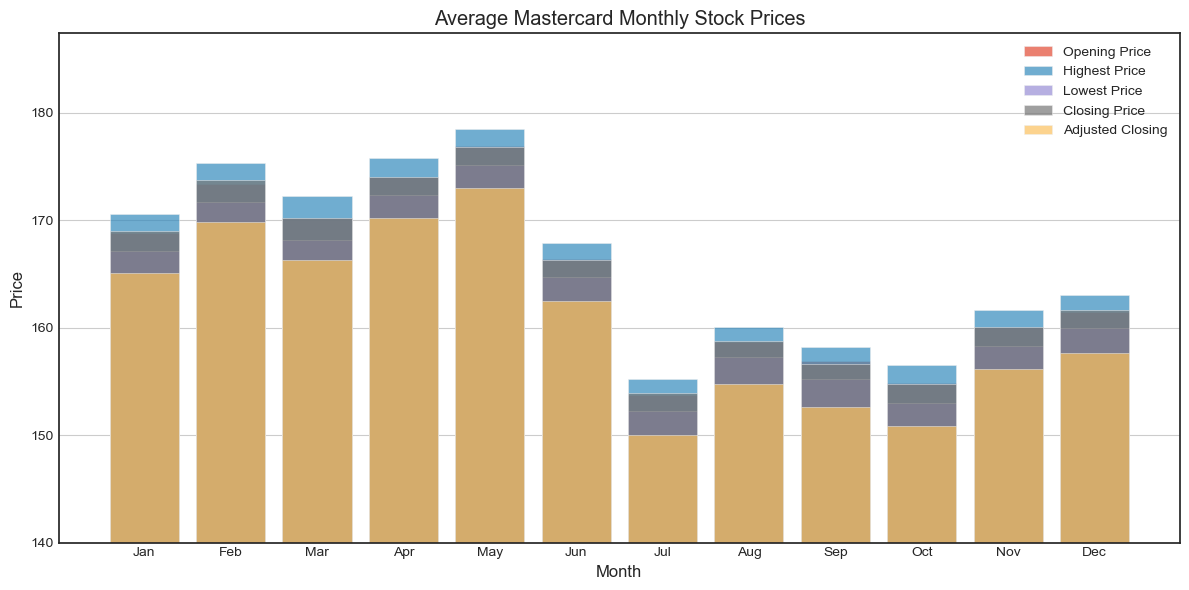

In [142]:
monthly_mean = company_mastercard.groupby(['Month'])[general_columns_to_plot].mean()

for column in general_columns_to_plot:
    plt.bar(monthly_mean.index, monthly_mean[column], label=column, alpha=0.7)

plt.title('Average Mastercard Monthly Stock Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(monthly_mean.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(140, None)  # Set y-axis starting point at 140
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('Average Mastercard Monthly Stock Prices.png')
plt.show()

In [143]:
company_visa.groupby(['Month'])[general_columns_to_plot].mean()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing
Month,,,,,
1,110.331540,111.407438,109.357903,110.403738,106.900875
2,112.826189,113.979137,111.889650,113.027622,109.572489
3,110.918162,112.174444,109.655235,110.930962,107.559661
4,113.208255,114.174751,112.093323,113.096714,109.654113
5,115.271428,116.255089,114.255599,115.299660,111.897435
6,109.137653,110.046322,108.169169,109.081974,105.763135
7,102.701065,103.593063,101.814075,102.818661,99.202174
8,104.797599,105.653715,103.981434,104.859484,101.334482
9,103.066052,103.844329,102.049909,102.860541,99.403790


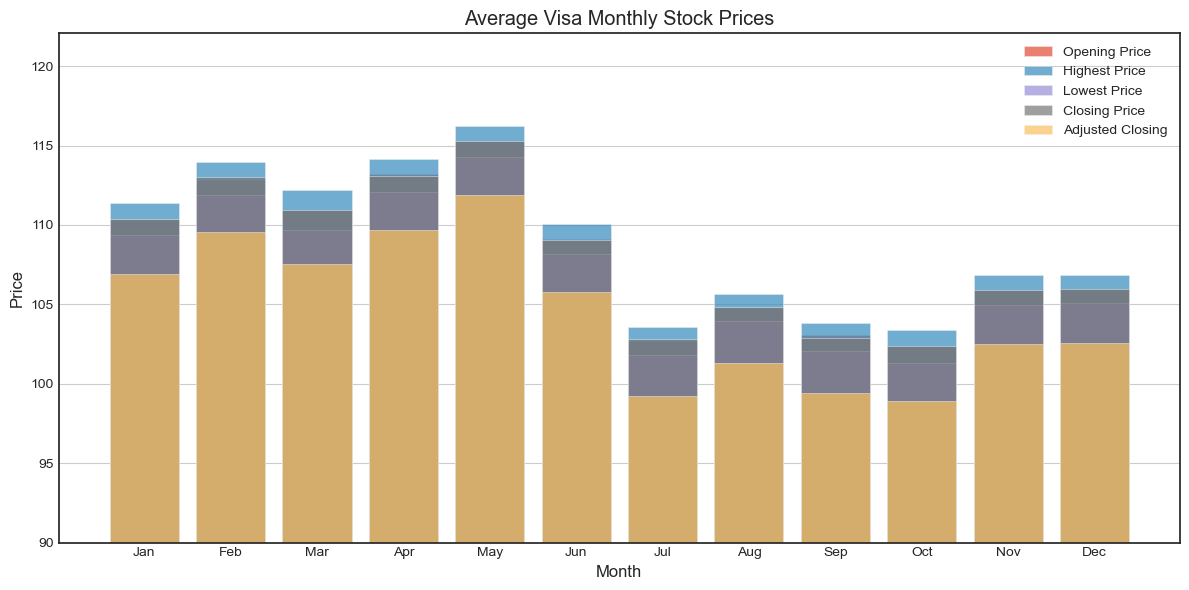

In [144]:
monthly_mean = company_visa.groupby(['Month'])[general_columns_to_plot].mean()

for column in general_columns_to_plot:
    plt.bar(monthly_mean.index, monthly_mean[column], label=column, alpha=0.7)

plt.title('Average Visa Monthly Stock Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(monthly_mean.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(90, None)  # Set y-axis starting point at 90
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('Average Visa Monthly Stock Prices.png')
plt.show()

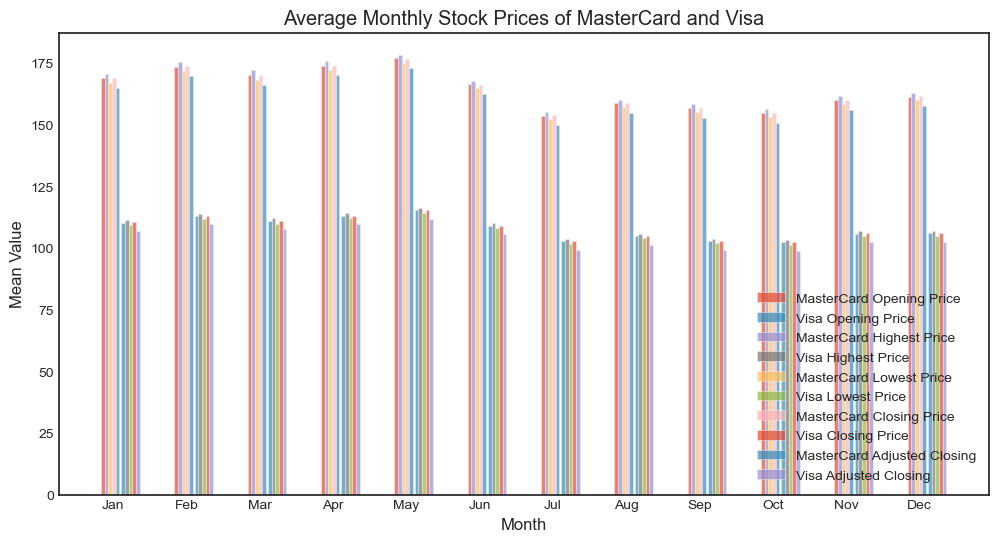

In [146]:
# Loop through the columns to plot
for column_index in range(len(general_columns_to_plot)):
    # Get the name of the column
    column_to_plot = general_columns_to_plot[column_index]
    # Group the dataframes by month and get the mean of the column
    mastercard_means = company_mastercard.groupby('Month')[column_to_plot].mean()
    visa_means = company_visa.groupby('Month')[column_to_plot].mean()

    # Get the indexes of the columns to plot - there should be 12
    mastercard_months = mastercard_means.index
    visa_months = visa_means.index

    # The months is the middle position of the x-axis label
    # subtract a number to make it go before the middle position; add to make it go after; the number is a guess
    # column_index * length of the bar so the bars are placed next to each other
    positions_mastercard = mastercard_months - 0.14 + column_index * 0.05  # Shift left for MasterCard
    positions_visa = visa_months + 0.14 + column_index * 0.05       # Shift right for Visa
    
    # Plotting the bars
    plt.bar(positions_mastercard, mastercard_means, width=0.05, label='MasterCard ' + column_to_plot, alpha=0.7)
    plt.bar(positions_visa, visa_means, width=0.05, label='Visa ' + column_to_plot, alpha=0.7)

    # 'Stacked' version | Mastercard/Visa columns are overlapping
    # remove the (columns_index * width) when calculating the position and set the +/- to 0.5
    # set the width to 0.3
    #positions_mastercard = mastercard_months - 0.5 # Shift left for MasterCard
    #positions_visa = visa_months + 0.5 # Shift right for Visa
    #plt.bar(positions_mastercard, mastercard_means, width=0.3, label='MasterCard ' + column_to_plot, alpha=0.7)
    #plt.bar(positions_visa, visa_means, width=0.3, label='Visa ' + column_to_plot, alpha=0.7)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Average Monthly Stock Prices of MasterCard and Visa')
plt.xticks(mastercard_months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='lower right')

plt.savefig('Average Stock Prices (Month).png')
plt.show()

In [148]:
company_mastercard.groupby(['DayOfWeek'])[general_columns_to_plot].mean()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing
DayOfWeek,,,,,
Friday,165.120192,166.668338,163.463527,165.201088,161.284775
Monday,163.065637,164.648955,161.334276,163.010386,159.083340
Thursday,165.393185,167.143975,163.686316,165.478553,161.561099
Tuesday,164.777000,166.312623,163.042310,164.645311,160.727446
Wednesday,164.220018,165.970170,162.656319,164.377032,160.466535


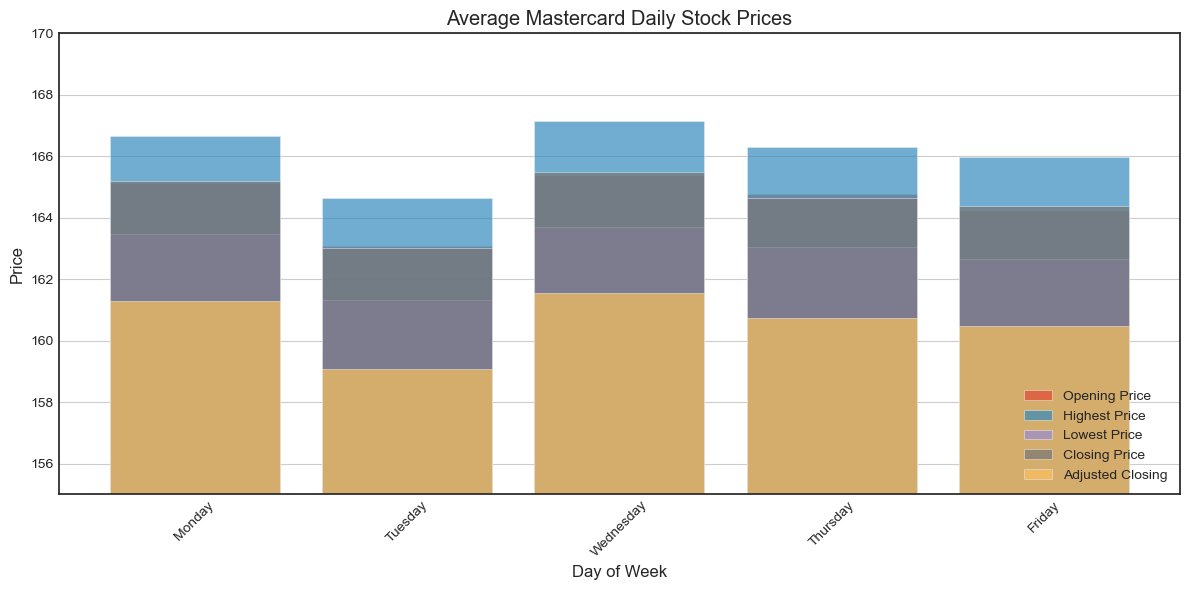

In [149]:
# Group by DayOfWeek and calculate mean
DayOfWeek_mean = company_mastercard.groupby(['DayOfWeek']).mean()

# Rename index to 'Monday' to 'Sunday'
DayOfWeek_mean.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Columns to plot
general_columns_to_plot = ['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 'Adjusted Closing']

# Iterate over each column and plot as a separate bar plot
for column in general_columns_to_plot:
    plt.bar(DayOfWeek_mean.index, DayOfWeek_mean[column], label=column, alpha=0.7)

plt.title('Average Mastercard Daily Stock Prices')
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.ylim(155, 170)  # Set y-axis starting point at 140
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('Average Mastercard Daily Stock Prices.png')
plt.show()

In [150]:
company_visa.groupby(['DayOfWeek'])[general_columns_to_plot].mean()

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing
DayOfWeek,,,,,
Friday,108.367170,109.323386,107.393120,108.427509,104.978738
Monday,107.137877,108.090046,106.126126,107.100099,103.636447
Thursday,108.480887,109.510921,107.473856,108.532473,105.084377
Tuesday,108.107548,109.021511,107.093086,108.039799,104.586674
Wednesday,107.790289,108.824061,106.849555,107.857365,104.410059


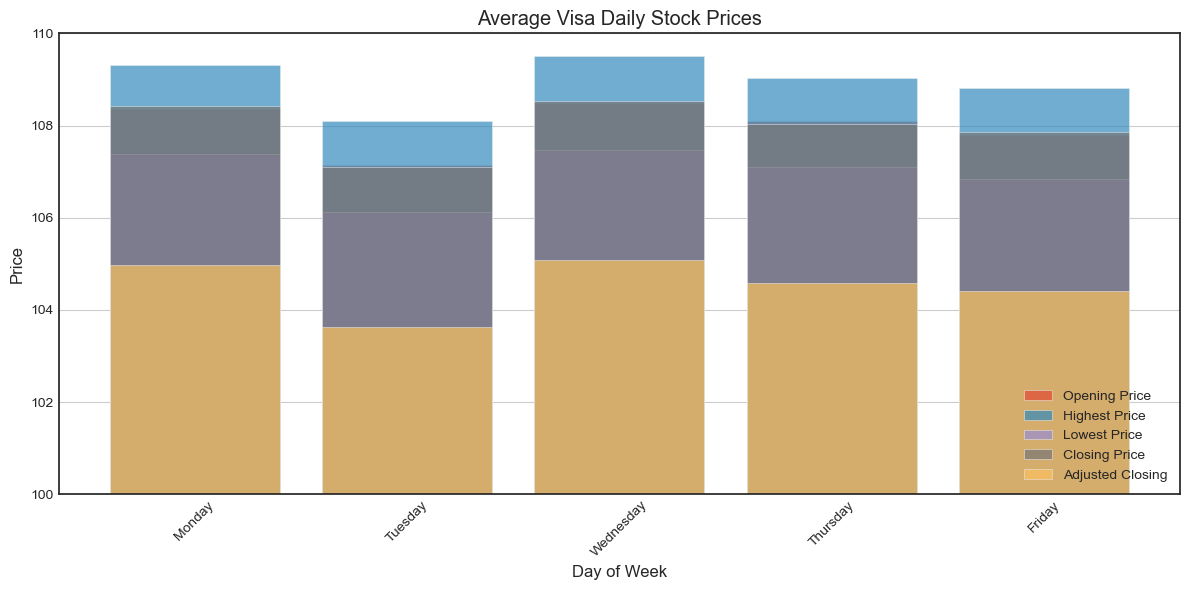

In [151]:
# Group by DayOfWeek and calculate mean
DayOfWeek_mean = company_visa.groupby(['DayOfWeek']).mean()

# Rename index to 'Monday' to 'Sunday'
DayOfWeek_mean.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Columns to plot
general_columns_to_plot = ['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 'Adjusted Closing']

# Iterate over each column and plot as a separate bar plot
for column in general_columns_to_plot:
    plt.bar(DayOfWeek_mean.index, DayOfWeek_mean[column], label=column, alpha=0.7)

plt.title('Average Visa Daily Stock Prices')
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.ylim(100, 110)  # Set y-axis starting point at 100 and end in 110
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('Average Visa Daily Stock Prices.png')
plt.show()

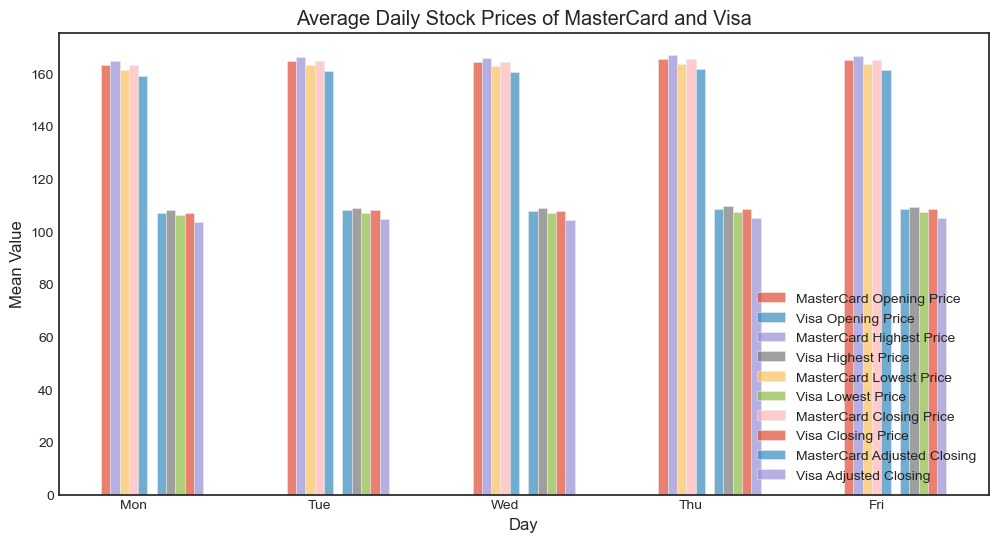

In [152]:
# loop through the columns to plot
for column_index in range(len(general_columns_to_plot)):
    # Get the column to plot
    column_to_plot = general_columns_to_plot[column_index]
    # Group the company by DayOfWeek_int and get the mean of that column
    mastercard_means = company_mastercard.groupby('DayOfWeek_int')[column_to_plot].mean()
    visa_means = company_visa.groupby('DayOfWeek_int')[column_to_plot].mean()

    # The DayOfWeek is the middle position of the x-axis label
    mastercard_DayOfWeek = mastercard_means.index
    visa_DayOfWeek = visa_means.index
    
    # subtract a number to make it go before the middle position; add to make it go after; the number is a guess
    # column_index * length of the bar so the bars are placed next to each other
    positions_mastercard = mastercard_DayOfWeek - 0.15 + column_index * 0.05  # Shift left for MasterCard
    positions_visa = visa_DayOfWeek + 0.15 + column_index * 0.05       # Shift right for Visa
    
    # Plotting the bars
    plt.bar(positions_mastercard, mastercard_means, width=0.05, label='MasterCard ' + column_to_plot, alpha=0.7)
    plt.bar(positions_visa, visa_means, width=0.05, label='Visa ' + column_to_plot, alpha=0.7)

    # 'Stacked' version | Mastercard/Visa columns are overlapping
    # remove the (columns_index * width) when calculating the position and set the +/- to 0.5
    # set the width to 0.3
    #positions_mastercard = mastercard_DayOfWeek - 0.5  # Shift left for MasterCard
    #positions_visa = visa_DayOfWeek + 0.5       # Shift right for Visa
    #plt.bar(positions_mastercard, mastercard_means, width=0.3, label='MasterCard ' + column_to_plot, alpha=0.7)
    #plt.bar(positions_visa, visa_means, width=0.3, label='Visa ' + column_to_plot, alpha=0.7)

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Mean Value')
plt.title('Average Daily Stock Prices of MasterCard and Visa')
plt.xticks(mastercard_DayOfWeek, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.legend(loc='lower right')


plt.savefig('Average Stock Prices (Day of Week).png')
# Show plot
plt.show()

In [153]:
# facecolor (fill) of the boxplots for each company
facecolor_mastercard = 'salmon'
facecolor_visa = 'skyblue'

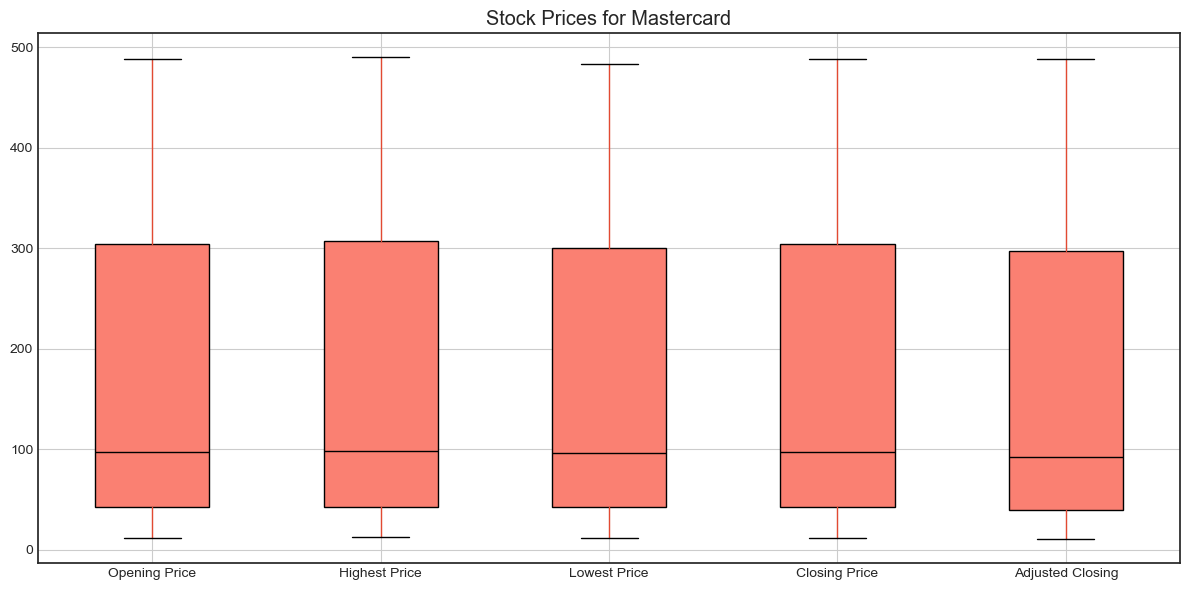

In [154]:
# Get the boxplot of the prices for mastercard
# Upper Bound
# 75 percentile
# Median
# 25 percentile
# Lower Bound
company_mastercard[general_columns_to_plot].boxplot(patch_artist=True, boxprops=dict(facecolor=facecolor_mastercard), medianprops=dict(color='black'))

plt.title('Stock Prices for Mastercard')
plt.tight_layout()
plt.savefig('boxplot stock price Mastercard.png')
plt.show()

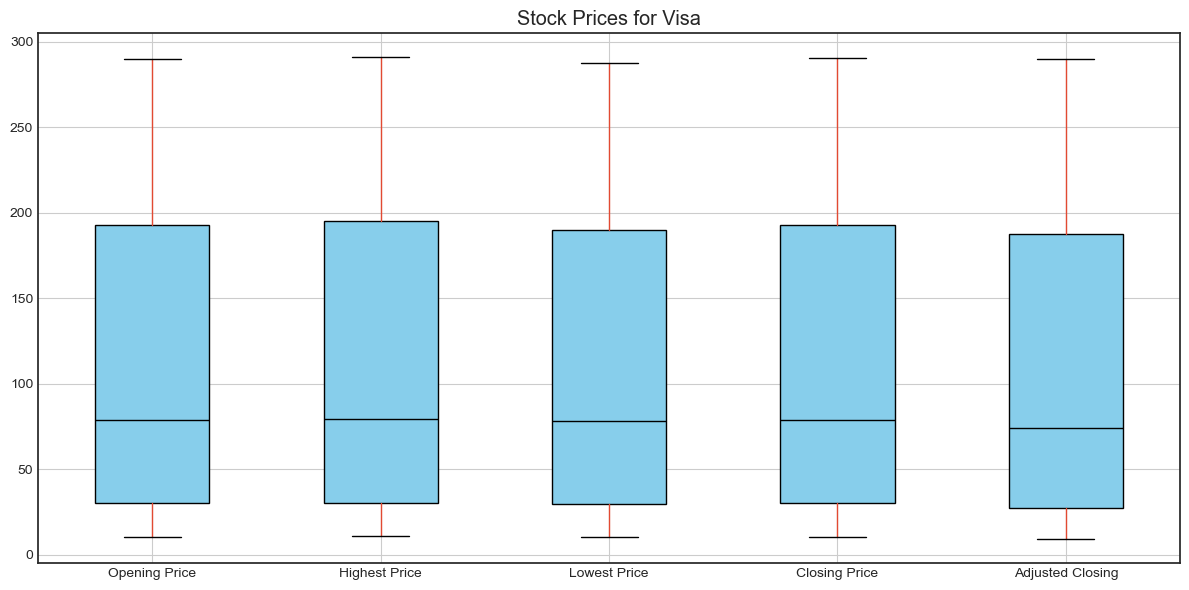

In [155]:
# Get the boxplot of the prices for visa
# Upper Bound
# 75 percentile
# Median
# 25 percentile
# Lower Bound
company_visa[general_columns_to_plot].boxplot(patch_artist=True, boxprops=dict(facecolor=facecolor_visa), medianprops=dict(color='black'))

plt.title('Stock Prices for Visa')
plt.tight_layout()
plt.savefig('boxplot stock price Visa.png')
plt.show()

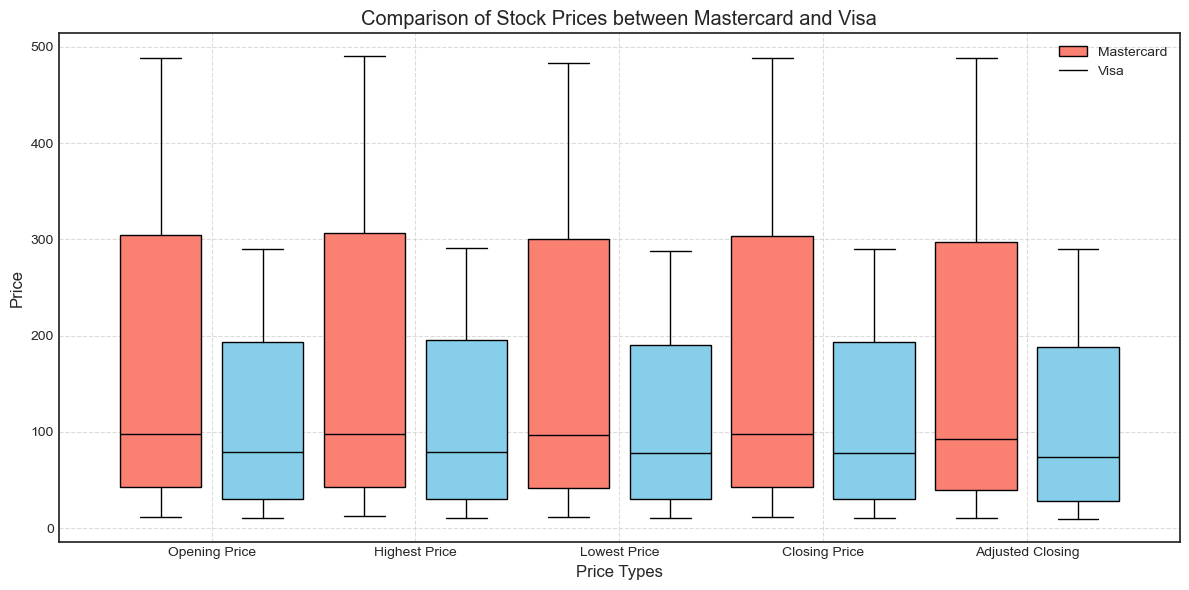

In [156]:
# Box plot of the prices

# Create figure and axes
fig, ax = plt.subplots()

# Boxplot for company_mastercard
ax.boxplot(company_mastercard[general_columns_to_plot].values, positions=[1, 2, 3, 4, 5], widths=0.4, patch_artist=True, boxprops=dict(facecolor=facecolor_mastercard), medianprops=dict(color='black'))
# Boxplot for company_visa
ax.boxplot(company_visa[general_columns_to_plot].values, positions=[1.5, 2.5, 3.5, 4.5, 5.5], widths=0.4, patch_artist=True, boxprops=dict(facecolor=facecolor_visa), medianprops=dict(color='black'))

# Customize labels and title
ax.set_xticks([1.25, 2.25, 3.25, 4.25, 5.25])
ax.set_xticklabels(general_columns_to_plot)
ax.set_xlabel('Price Types')
ax.set_ylabel('Price')
ax.set_title('Comparison of Stock Prices between Mastercard and Visa')

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend(['Mastercard', 'Visa'])

plt.tight_layout()
# Save the plot as image (optional)
plt.savefig('boxplot stock price.png')

# Show the plot
plt.show()

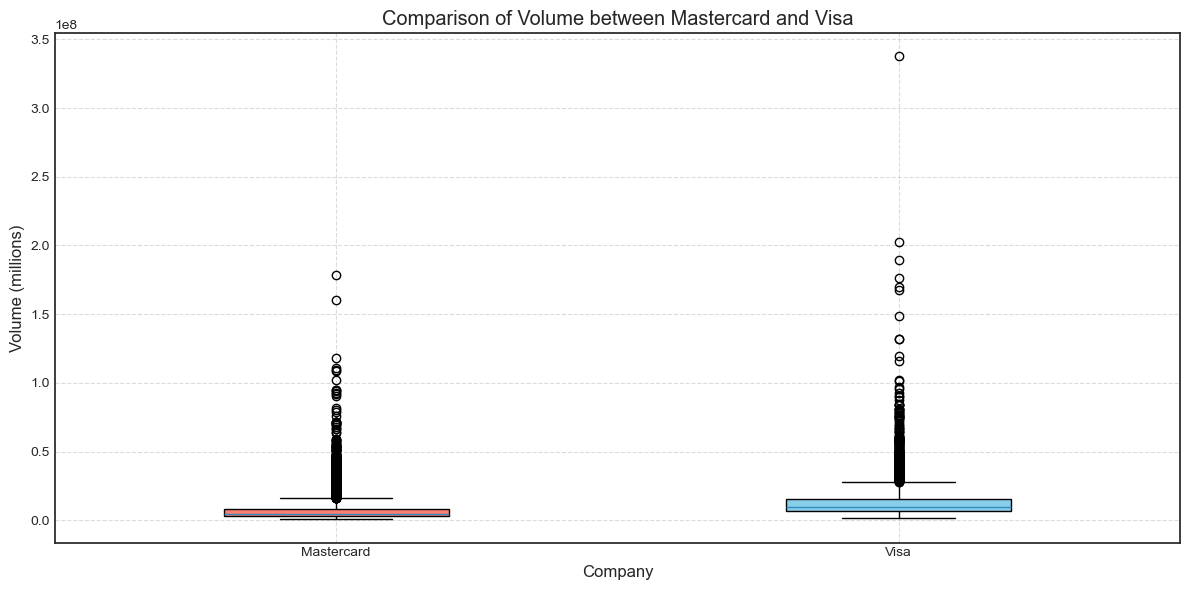

In [157]:
# Box plot for the volume / number of shares traded

# Create figure and axes
fig, ax = plt.subplots()

# Boxplot for company_mastercard
ax.boxplot(company_mastercard['Volume'], positions=[0.5], widths=0.4, patch_artist=True, boxprops=dict(facecolor=facecolor_mastercard))

# Boxplot for company_visa
ax.boxplot(company_visa['Volume'], positions=[1.5], widths=0.4, patch_artist=True, boxprops=dict(facecolor=facecolor_visa))

# Customize labels and title
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Mastercard', 'Visa'])
ax.set_xlabel('Company')
ax.set_ylabel('Volume (millions)')
ax.set_title('Comparison of Volume between Mastercard and Visa')

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# Save the plot as image (optional)
plt.savefig('companies_volume_boxplot.png')

# Show the plot
plt.show()

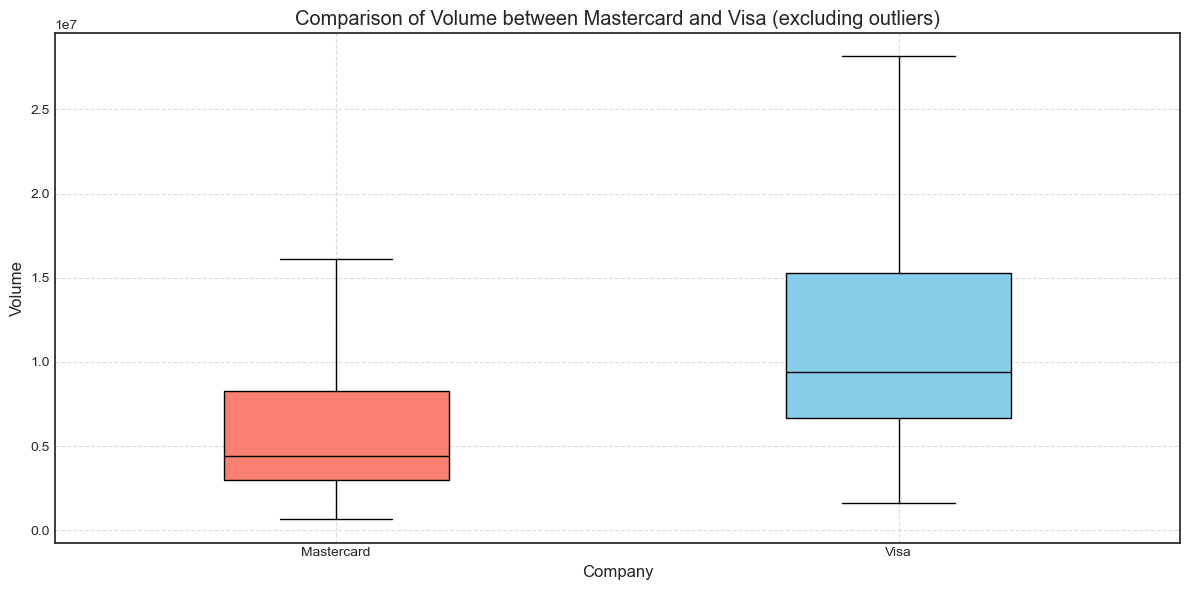

In [158]:
# Create figure and axes
fig, ax = plt.subplots()

# Boxplot for company_mastercard
ax.boxplot(company_mastercard['Volume'], positions=[0.5], widths=0.4, patch_artist=True, boxprops=dict(facecolor=facecolor_mastercard), medianprops=dict(color='black'), showfliers=False)

# Boxplot for company_visa
ax.boxplot(company_visa['Volume'], positions=[1.5], widths=0.4, patch_artist=True, boxprops=dict(facecolor=facecolor_visa), medianprops=dict(color='black'), showfliers=False)

# Customize labels and title
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Mastercard', 'Visa'])
ax.set_xlabel('Company')
ax.set_ylabel('Volume')
ax.set_title('Comparison of Volume between Mastercard and Visa (excluding outliers)')

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
# Save the plot as image (optional)
plt.savefig('companies_volume-outliers_boxplot.png')

# Show the plot
plt.show()

In [159]:
# There were a lot of outliers in the Volume column

# Get the list of 'Volume' from both companies
volume_mastercard = company_mastercard['Volume']
volume_visa = company_visa['Volume']

# Calculate the lower/upper bound for Mastercard
q1_mastercard, q3_mastercard = volume_mastercard.quantile(0.25), volume_mastercard.quantile(0.75)
iqr_mastercard = q3_mastercard - q1_mastercard
lower_bound_mastercard = q1_mastercard - 1.5 * iqr_mastercard
upper_bound_mastercard = q3_mastercard + 1.5 * iqr_mastercard

# calculate the lower/upper outliers for mastercard and combine them into one
lower_outlier_volumes_mastercard = volume_mastercard[(volume_mastercard < lower_bound_mastercard)]
upper_outlier_volumes_mastercard = volume_mastercard[(volume_mastercard > upper_bound_mastercard)]
outlier_volumes_mastercard = pd.concat([lower_outlier_volumes_mastercard, upper_outlier_volumes_mastercard])

# Calculate outlier rates of mastercard
total_mastercard = len(volume_mastercard)
outliers_count_mastercard_lower = len(lower_outlier_volumes_mastercard)
outliers_count_mastercard_upper = len(upper_outlier_volumes_mastercard)
outliers_count_mastercard = len(outlier_volumes_mastercard)
outlier_rate_mastercard = (outliers_count_mastercard / total_mastercard) * 100

# Calculate the lower/upper bound for Visa
q1_visa, q3_visa = volume_visa.quantile(0.25), volume_visa.quantile(0.75)
iqr_visa = q3_visa - q1_visa
lower_bound_visa = q1_visa - 1.5 * iqr_visa
upper_bound_visa = q3_visa + 1.5 * iqr_visa

# Calculate the lower/upper outliers for visa and combine them into one
lower_outlier_volumes_visa = volume_visa[(volume_visa < lower_bound_visa)]
upper_outlier_volumes_visa = volume_visa[(volume_visa > upper_bound_visa)]
outlier_volumes_visa = pd.concat([lower_outlier_volumes_visa, upper_outlier_volumes_visa])

# Calculate the outlier rates of Visa
total_visa = len(volume_visa)
outliers_count_visa_lower = len(lower_outlier_volumes_visa)
outliers_count_visa_upper = len(upper_outlier_volumes_visa)
outliers_count_visa = len(outlier_volumes_visa)
outlier_rate_visa = (outliers_count_visa / total_visa) * 100

# Print outlier information
print(f"Mastercard (Volume)\n\tTotal: {total_mastercard}\n\tLower Outliers: {outliers_count_mastercard_lower}\n\tUpper Outliers: {outliers_count_mastercard_upper}\n\tTotal Outliers: {outliers_count_mastercard}\n\tOutlier Rate: {outlier_rate_mastercard:.2f}%")
print(f"Visa (Volume)\n\tTotal: {total_visa}\n\tLower Outliers: {outliers_count_visa_lower}\n\tUpper Outliers: {outliers_count_visa_upper}\n\tTotal Outliers: {outliers_count_visa}\n\tOutlier Rate: {outlier_rate_visa:.2f}%")

Mastercard (Volume)
	Total: 4047
	Lower Outliers: 0
	Upper Outliers: 441
	Total Outliers: 441
	Outlier Rate: 10.90%
Visa (Volume)
	Total: 4047
	Lower Outliers: 0
	Upper Outliers: 385
	Total Outliers: 385
	Outlier Rate: 9.51%


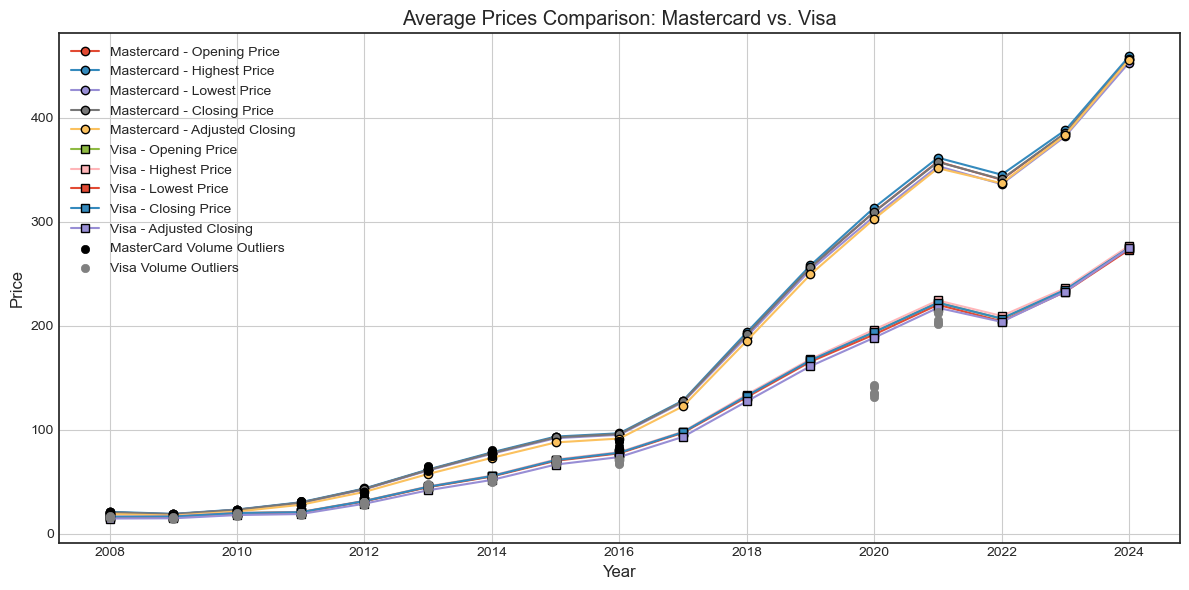

In [160]:
# Get the date of the outliers and plot them in a chart

# Merge (Inner) to only get the dates that are outliers
outliers_mastercard = pd.merge(company_mastercard, outlier_volumes_mastercard, on=['Volume'], how='inner')
outliers_visa = pd.merge(company_visa, outlier_volumes_visa, on=['Volume'], how='inner')

# Plotting lines for Mastercard
for column in general_columns_to_plot:
    plt.plot(company_mastercard.groupby(['Year'])[column].mean().index,
             company_mastercard.groupby(['Year'])[column].mean(),
             marker='o', label=f'Mastercard - {column}')

# Scatter plot for Mastercard outliers
for column in general_columns_to_plot:
    plt.scatter(outliers_mastercard.groupby(['Year'])[column].mean().index,
             outliers_mastercard.groupby(['Year'])[column].mean(),
             color='black', label='_nolegend_', zorder=5)

# Plotting lines for Visa
for column in general_columns_to_plot:
    plt.plot(company_visa.groupby(['Year'])[column].mean().index,
             company_visa.groupby(['Year'])[column].mean(),
             marker='s', label=f'Visa - {column}')
    
# Scatter plot for Mastercard outliers
for column in general_columns_to_plot:
    plt.scatter(outliers_visa.groupby(['Year'])[column].mean().index,
             outliers_visa.groupby(['Year'])[column].mean(),
             color='gray', label='_nolegend_', zorder=5)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Prices Comparison: Mastercard vs. Visa')

plt.scatter([], [], color='black', label='MasterCard Volume Outliers', zorder=5)
plt.scatter([], [], color='gray', label='Visa Volume Outliers', zorder=5)

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('Average Stock Prices with outliers.png')
# Display the plot
plt.show()

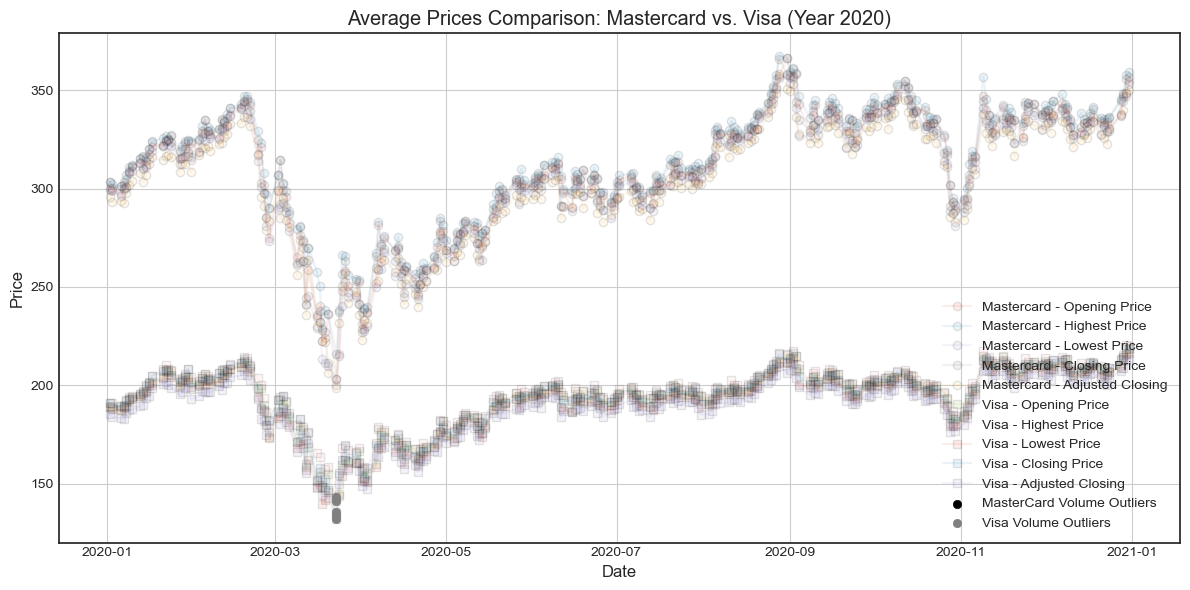

In [161]:
# There weren't really a big significance except during 2020
# Check the 2020 year

# Filter data for year 2020
company_mastercard_2020 = company_mastercard[company_mastercard['Year'] == 2020]
company_visa_2020 = company_visa[company_visa['Year'] == 2020]
outliers_mastercard_2020 = outliers_mastercard[outliers_mastercard['Year'] == 2020]
outliers_visa_2020 = outliers_visa[outliers_visa['Year'] == 2020]

# Plotting lines for Mastercard
for column in general_columns_to_plot:
    plt.plot(company_mastercard_2020['Date'],
             company_mastercard_2020[column],
             marker='o', label=f'Mastercard - {column}', alpha=0.1)

# Scatter plot for Mastercard outliers
for column in general_columns_to_plot:
    plt.scatter(outliers_mastercard_2020['Date'],
                outliers_mastercard_2020[column],
                color='black', label='_nolegend_', zorder=5)

# Plotting lines and outliers for Visa
for column in general_columns_to_plot:
    plt.plot(company_visa_2020['Date'],
             company_visa_2020[column],
             marker='s', label=f'Visa - {column}', alpha=0.1)

# Scatter plot for Visa outliers
for column in general_columns_to_plot:
    plt.scatter(outliers_visa_2020['Date'],
                outliers_visa_2020[column],
                color='gray', label='_nolegend_', zorder=5)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Average Prices Comparison: Mastercard vs. Visa (Year 2020)')

plt.scatter([], [], color='black', label='MasterCard Volume Outliers', zorder=5)
plt.scatter([], [], color='gray', label='Visa Volume Outliers', zorder=5)

plt.legend(loc='lower right')

plt.grid(True)
plt.tight_layout()

plt.savefig('Average Stock Prices with outliers 2020.png')
# Display the plot
plt.show()

In [162]:
# The outlier is between March 2020 and May 2020
# Get the data between those months
outliers_visa[(outliers_visa['Date'].dt.strftime('%Y-%m') == '2020-03') | (outliers_visa['Date'].dt.strftime('%Y-%m') == '2020-05')]

,Date,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing,Volume,Year,Month,DayOfWeek_int,DayOfWeek
386,2020-03-23,141.330002,143.350006,133.929993,135.740005,131.732117,30344100,2020,3,0,Monday


In [163]:
# Convert the DataFrames with the right format for a candlestick chart
# Do not run this cell more than once
# And you can not run the cells before unless you re-create the dataframe again

# Convert 'Date' column to datetime
company_mastercard['Date'] = pd.to_datetime(company_mastercard['Date'])
company_visa['Date'] = pd.to_datetime(company_visa['Date'])

# Set 'Date' as the index
company_mastercard.set_index('Date', inplace=True)
company_visa.set_index('Date', inplace=True)

# Rename columns to match mplfinance expectations
company_mastercard.rename(columns={
    'Opening Price': 'Open',
    'Highest Price': 'High',
    'Lowest Price': 'Low',
    'Closing Price': 'Close',
    'Volume': 'Volume'
}, inplace=True)

company_visa.rename(columns={
    'Opening Price': 'Open',
    'Highest Price': 'High',
    'Lowest Price': 'Low',
    'Closing Price': 'Close',
    'Volume': 'Volume'
}, inplace=True)

C:\Users\User\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


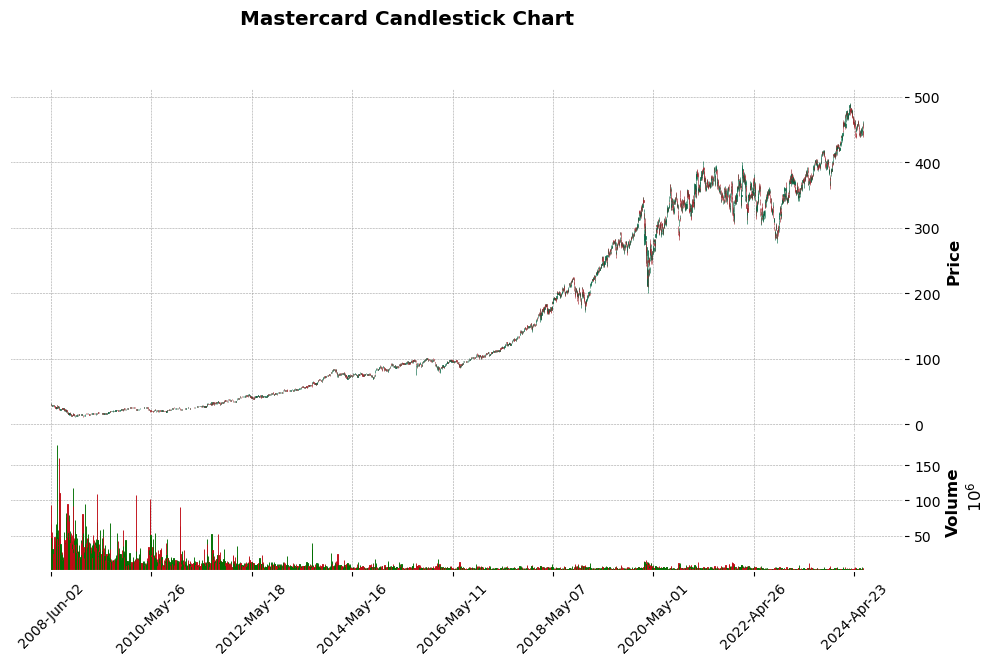

In [164]:
# A normal plotting will cause a warning
# The details is not clear because there is too much data
# Example
mpf.plot(
    company_mastercard,
    type='candle',
    volume=True,
    style='charles',
    title='Mastercard Candlestick Chart',
    ylabel='Price',
    ylabel_lower='Volume',
    figratio=(18, 10),
    figscale=1.2
)

In [165]:
# Check all available styles for mplfinance
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

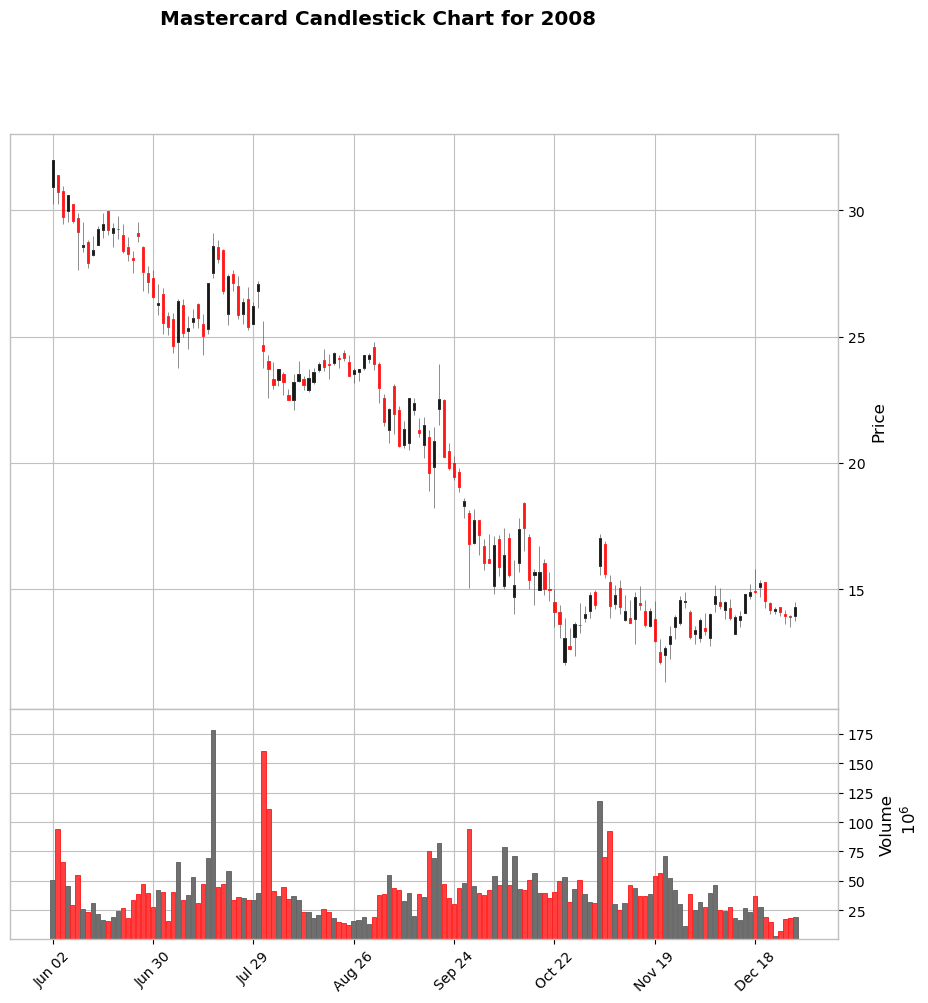

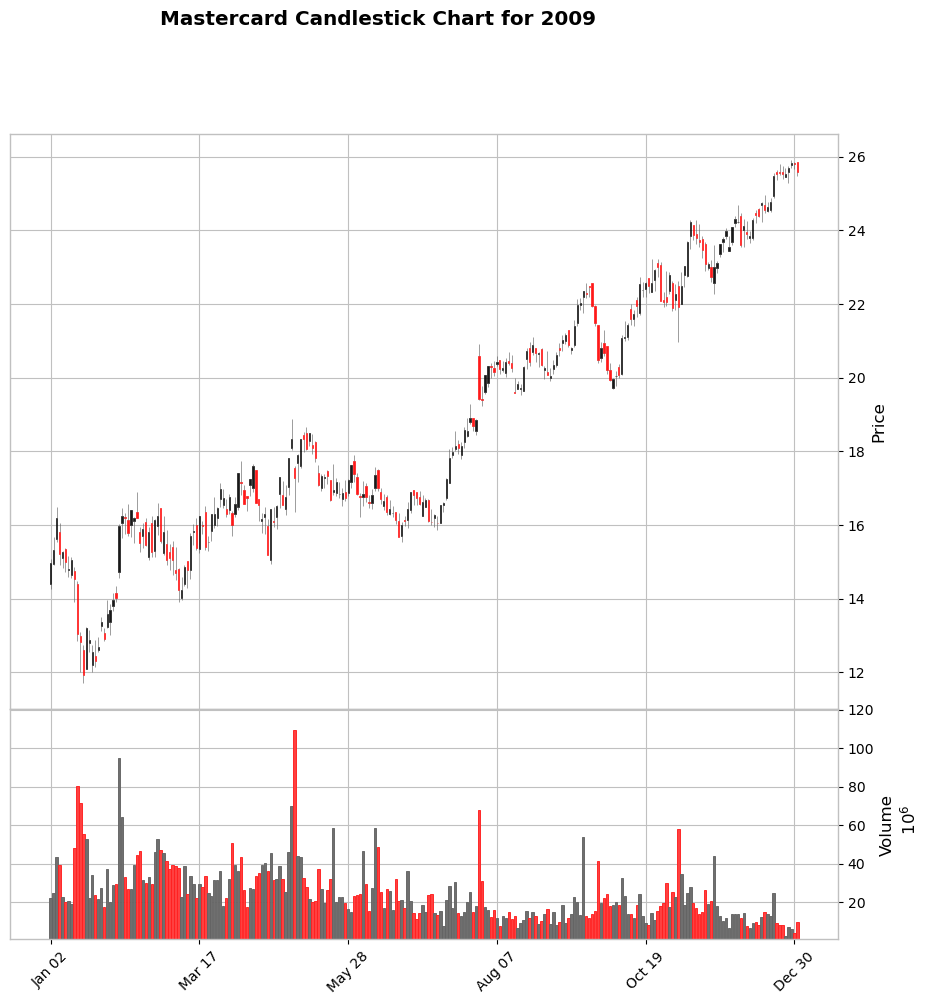

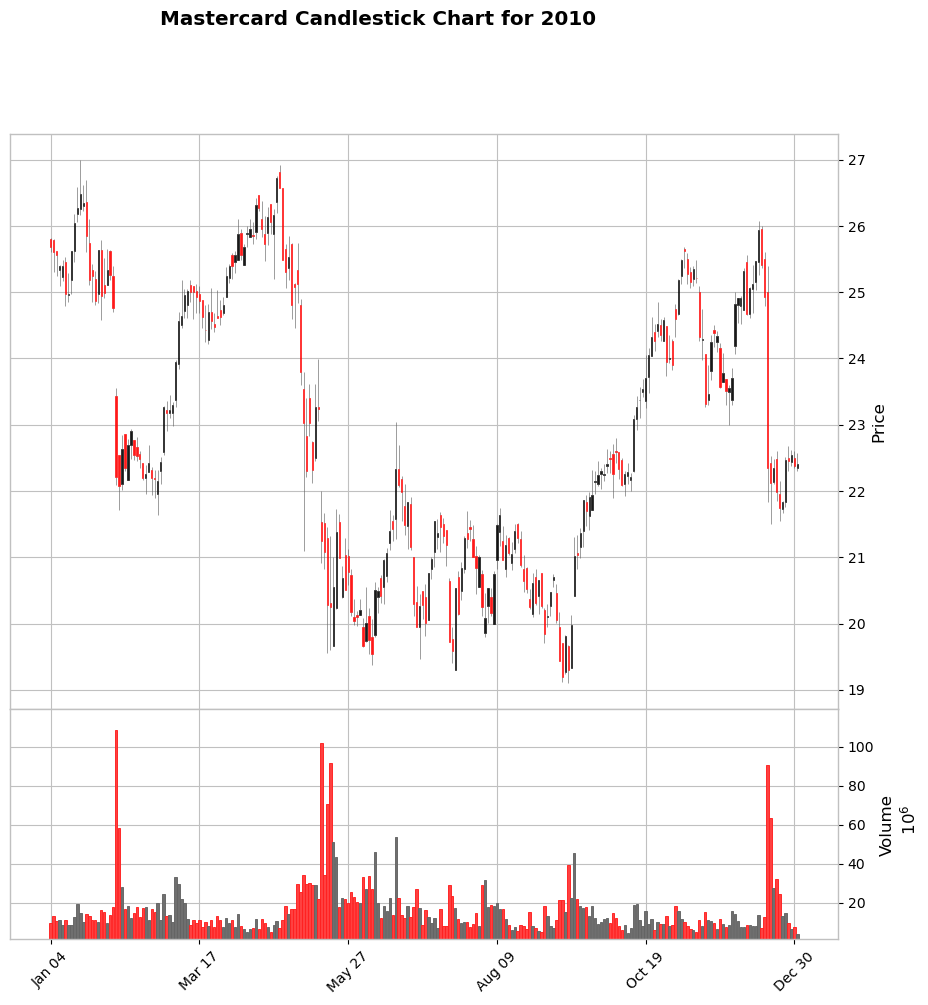

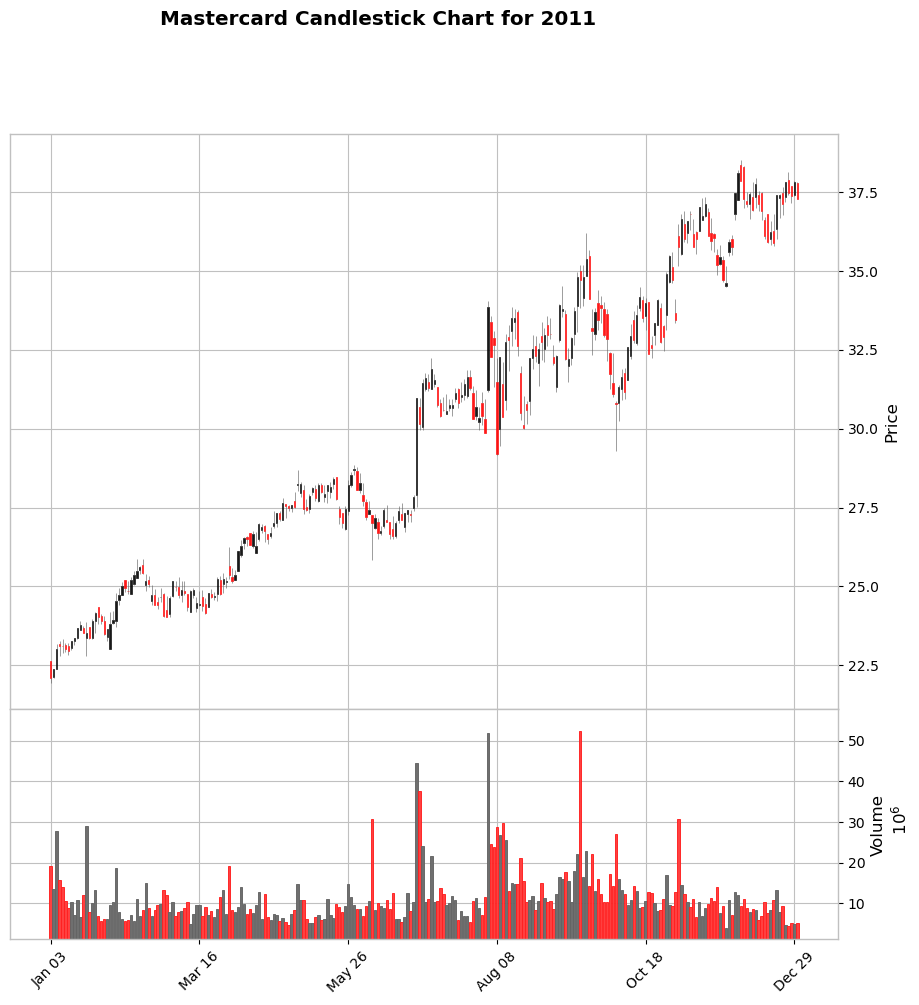

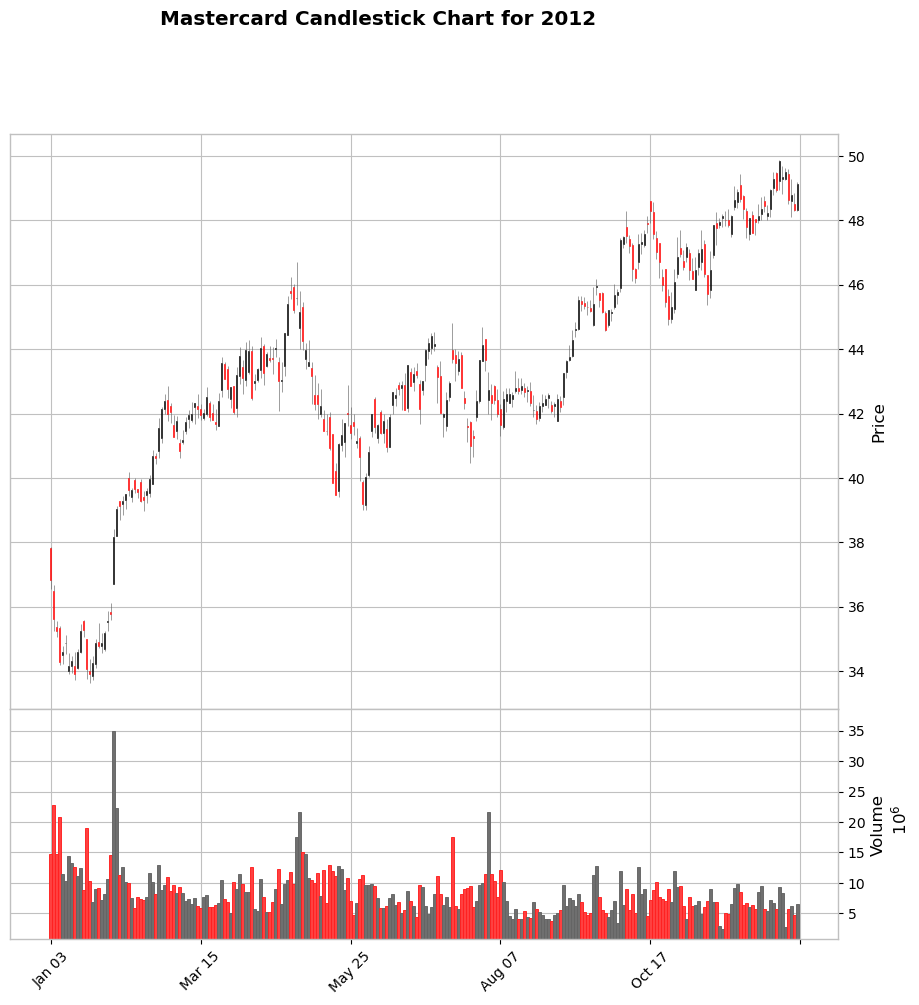

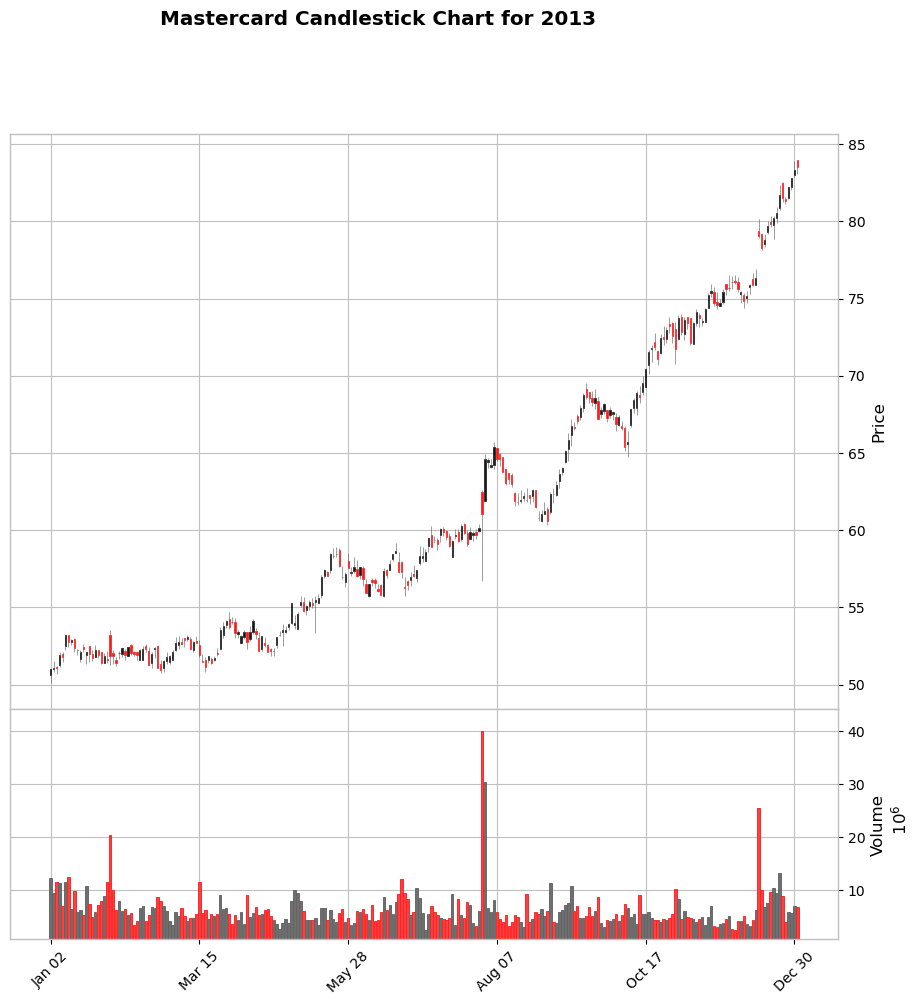

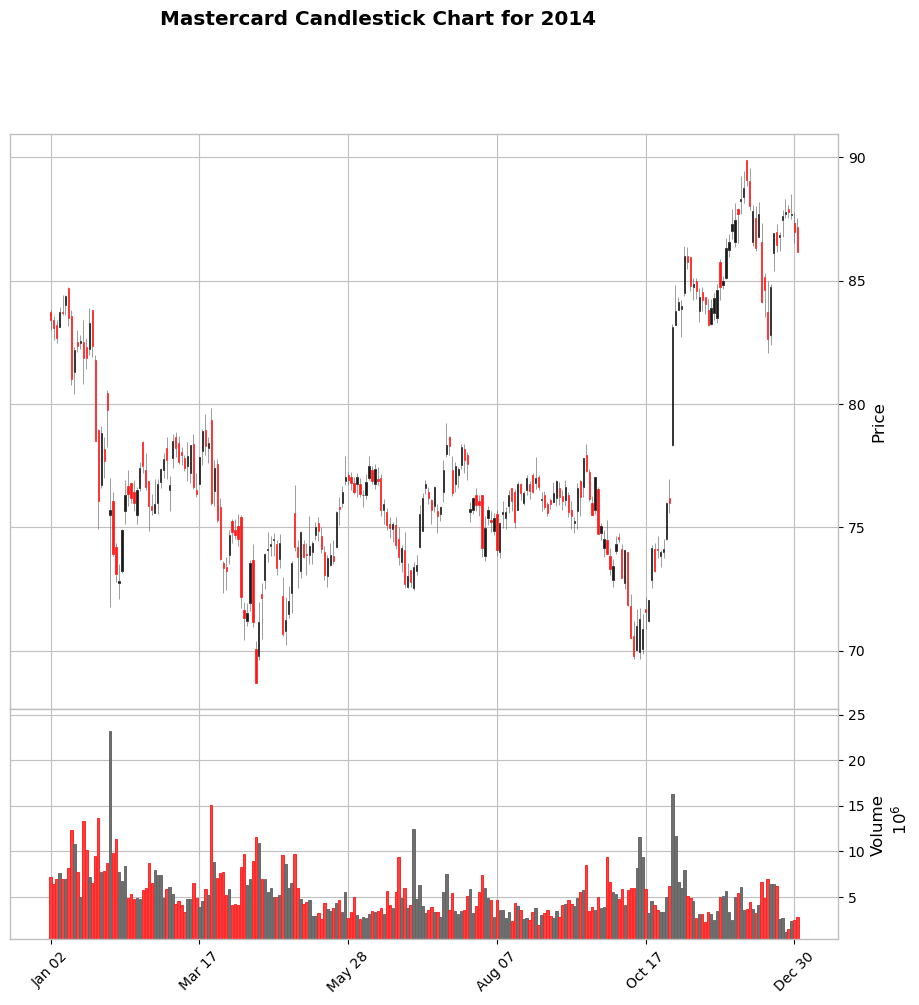

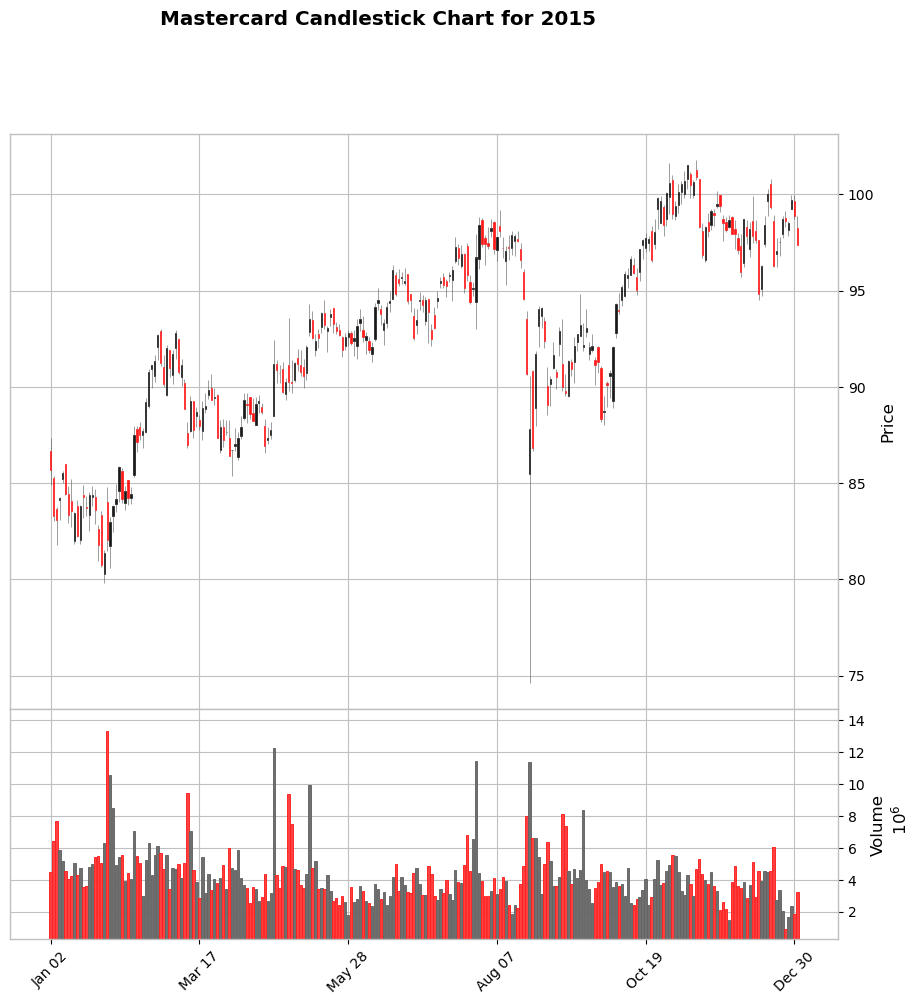

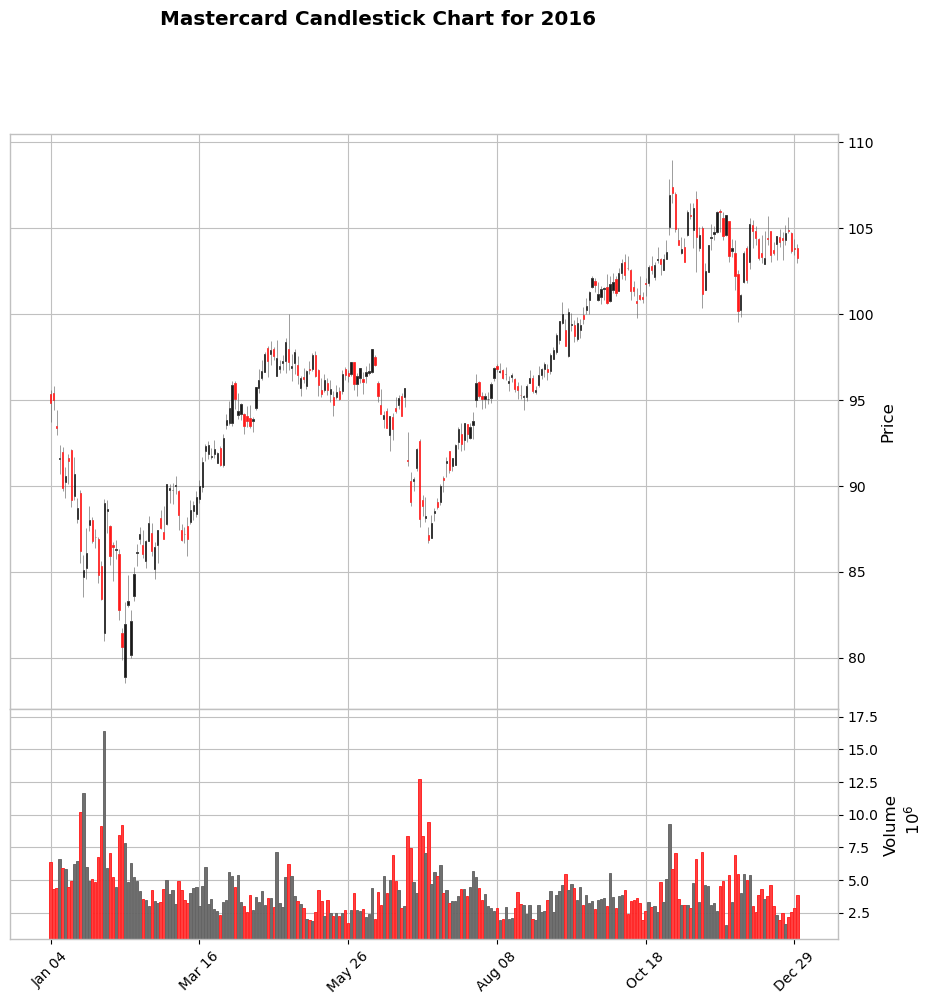

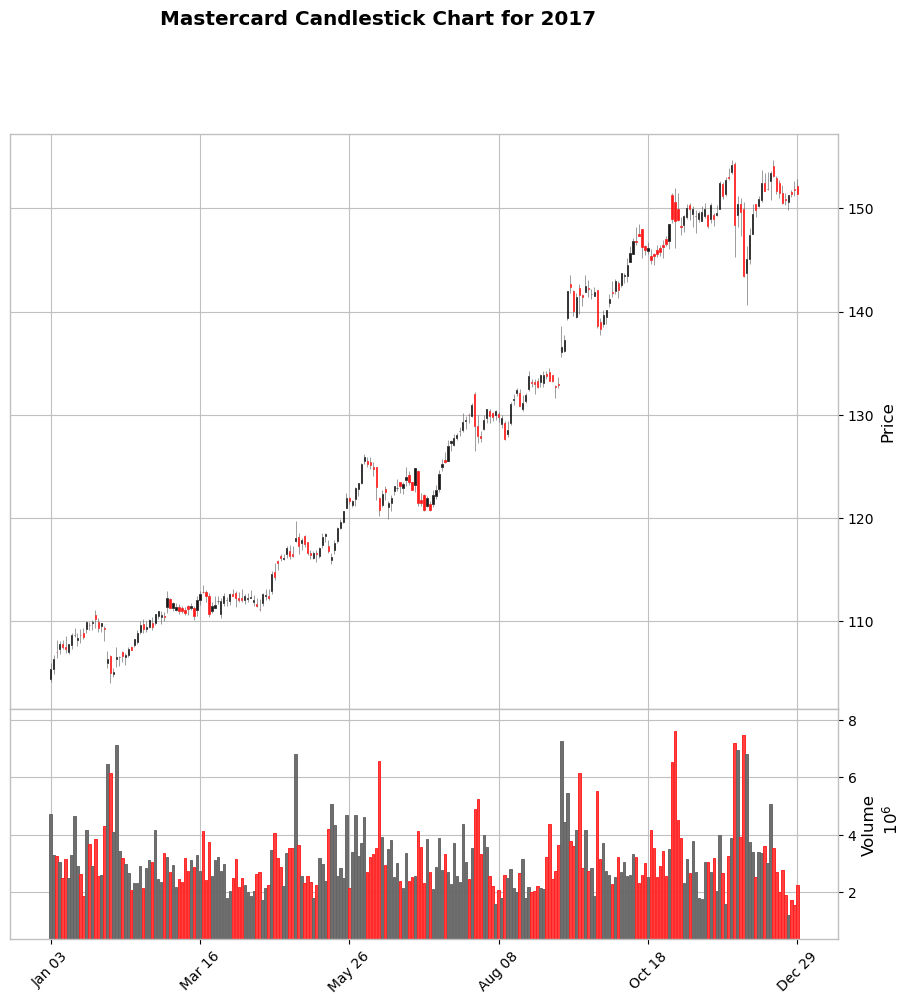

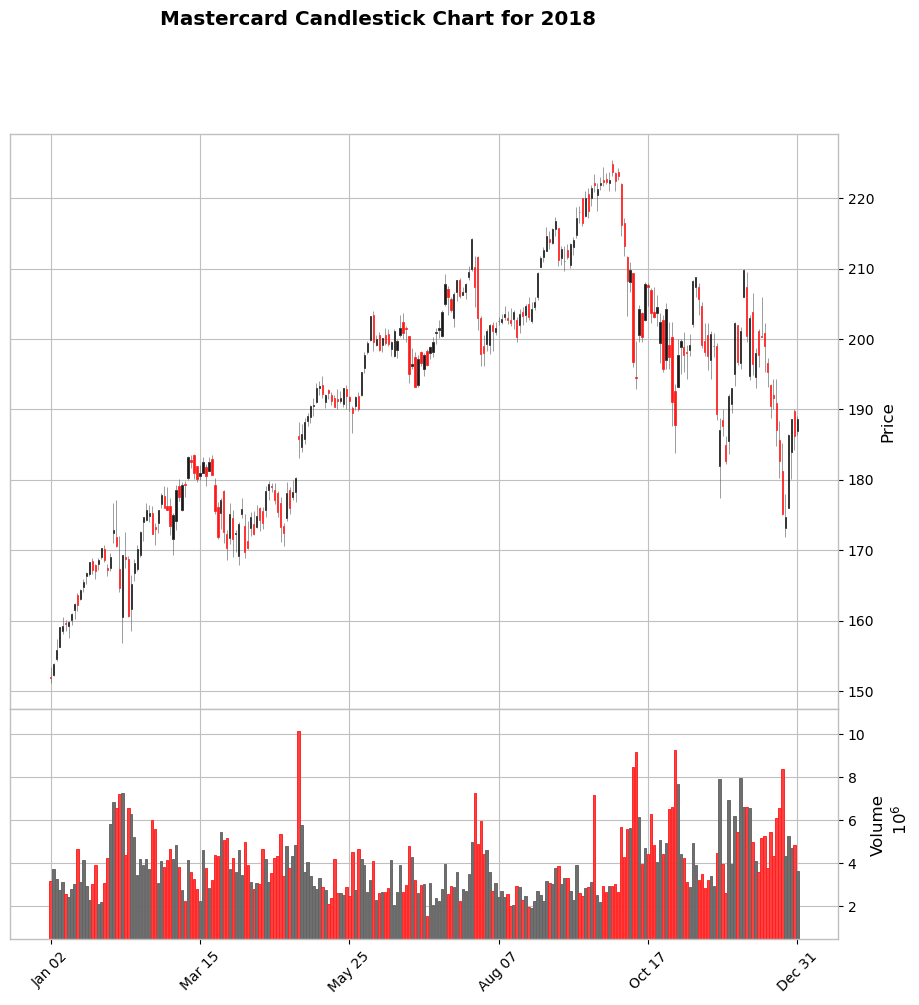

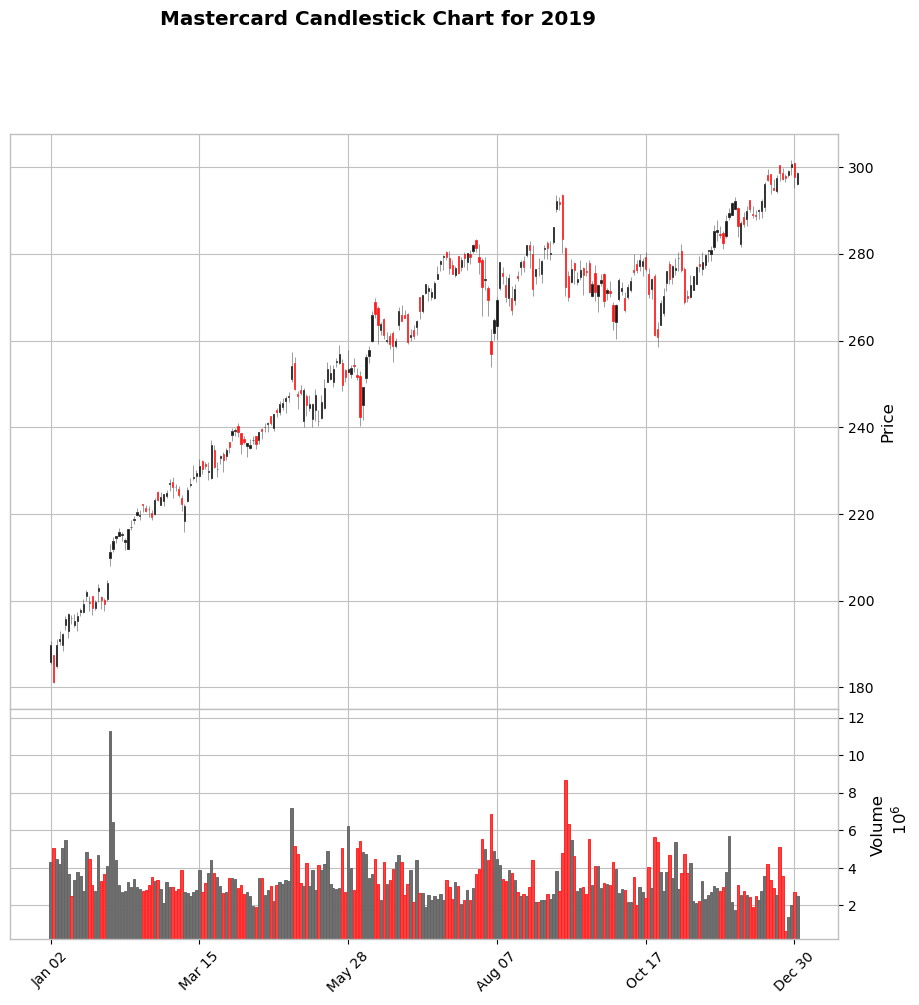

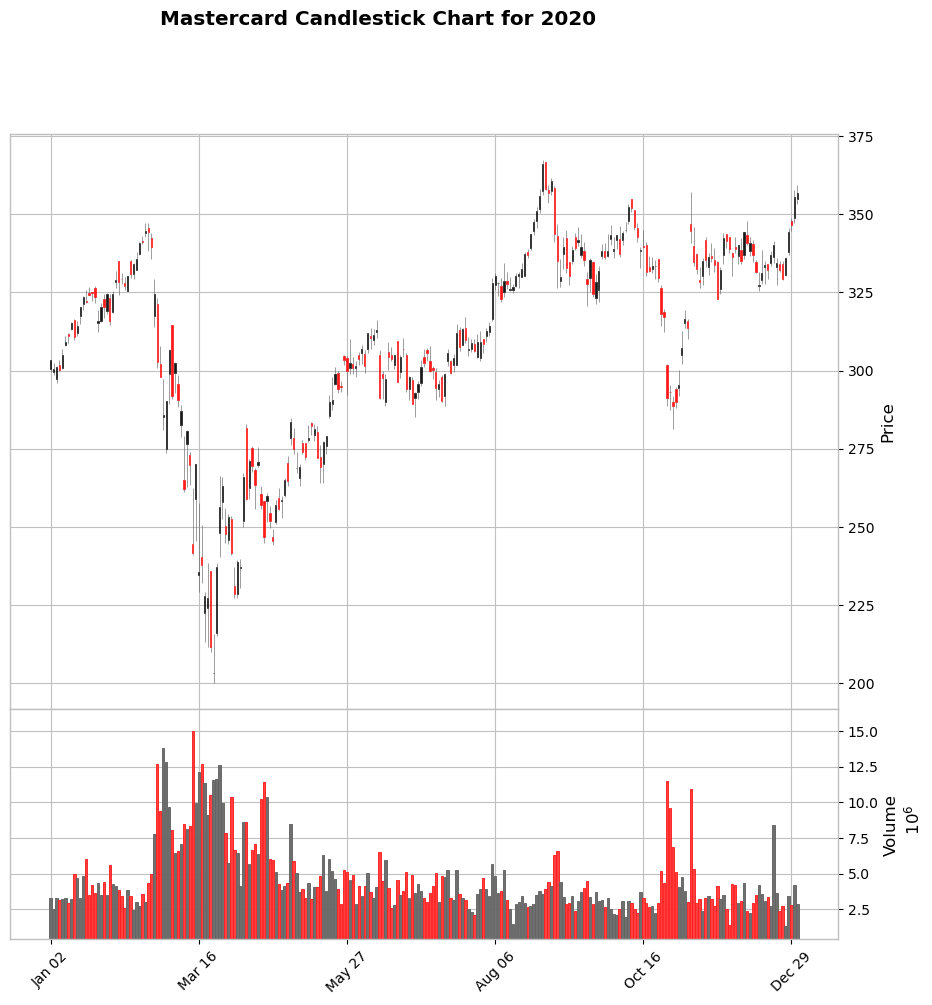

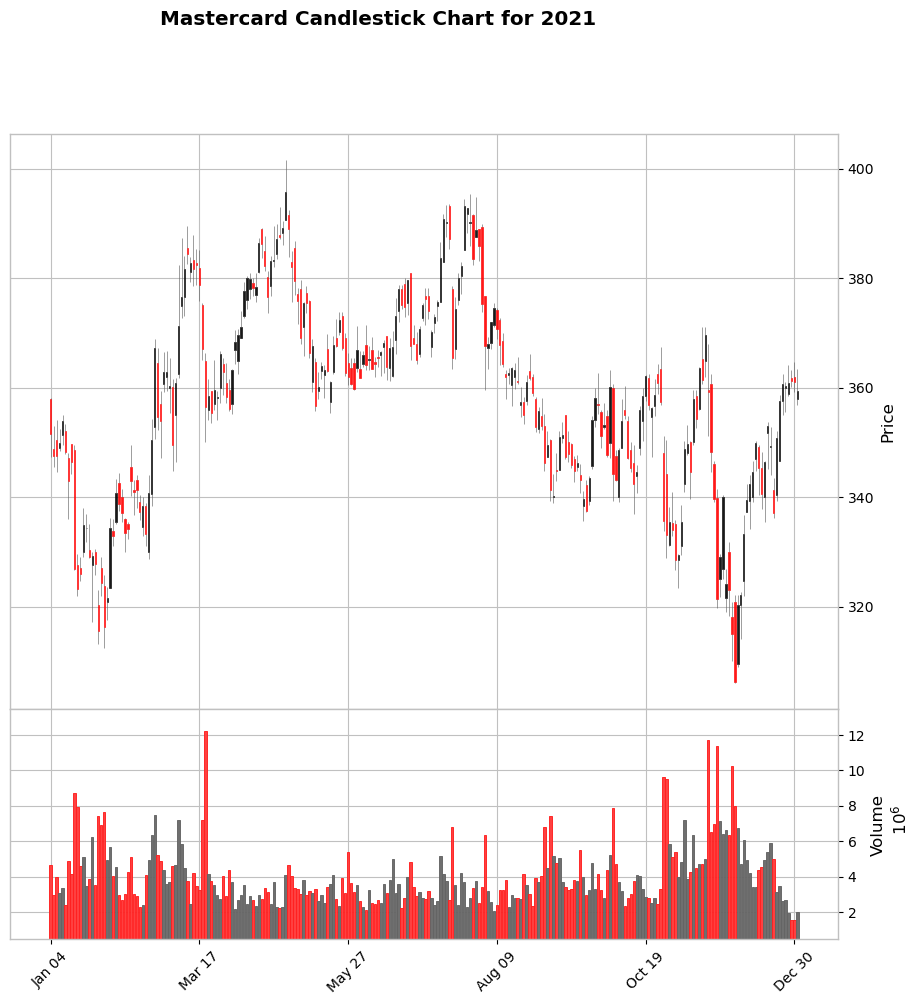

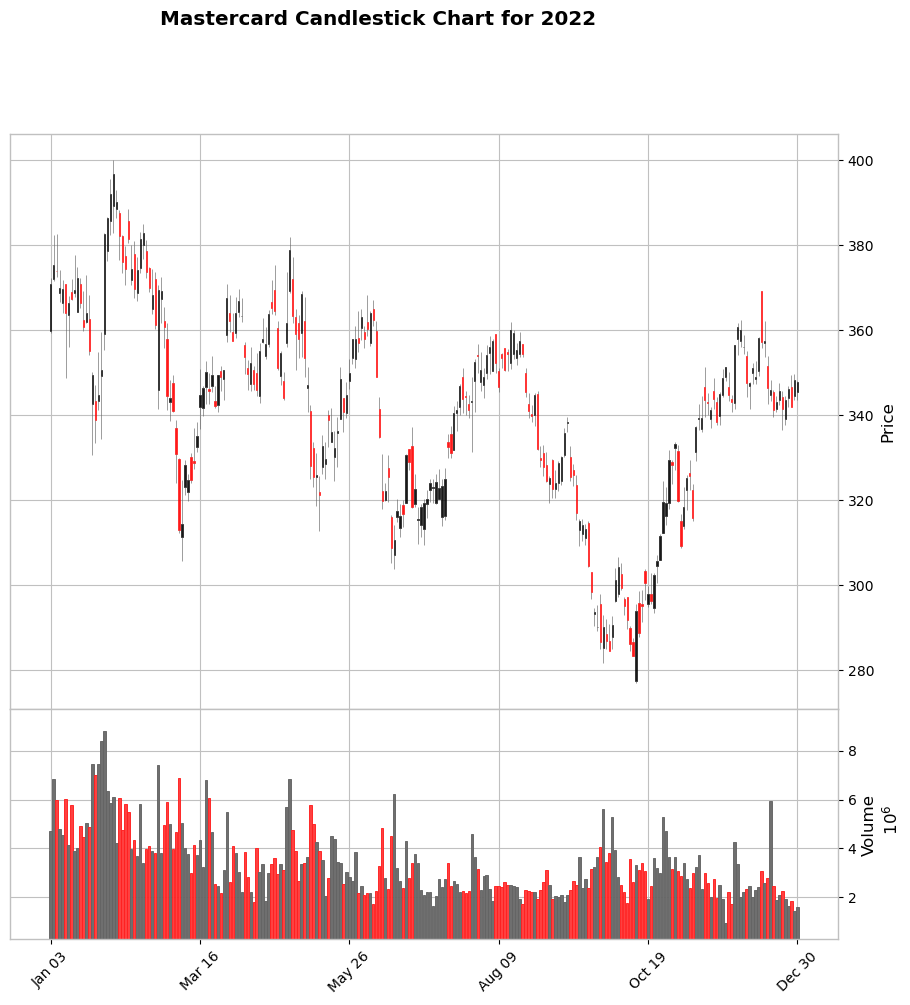

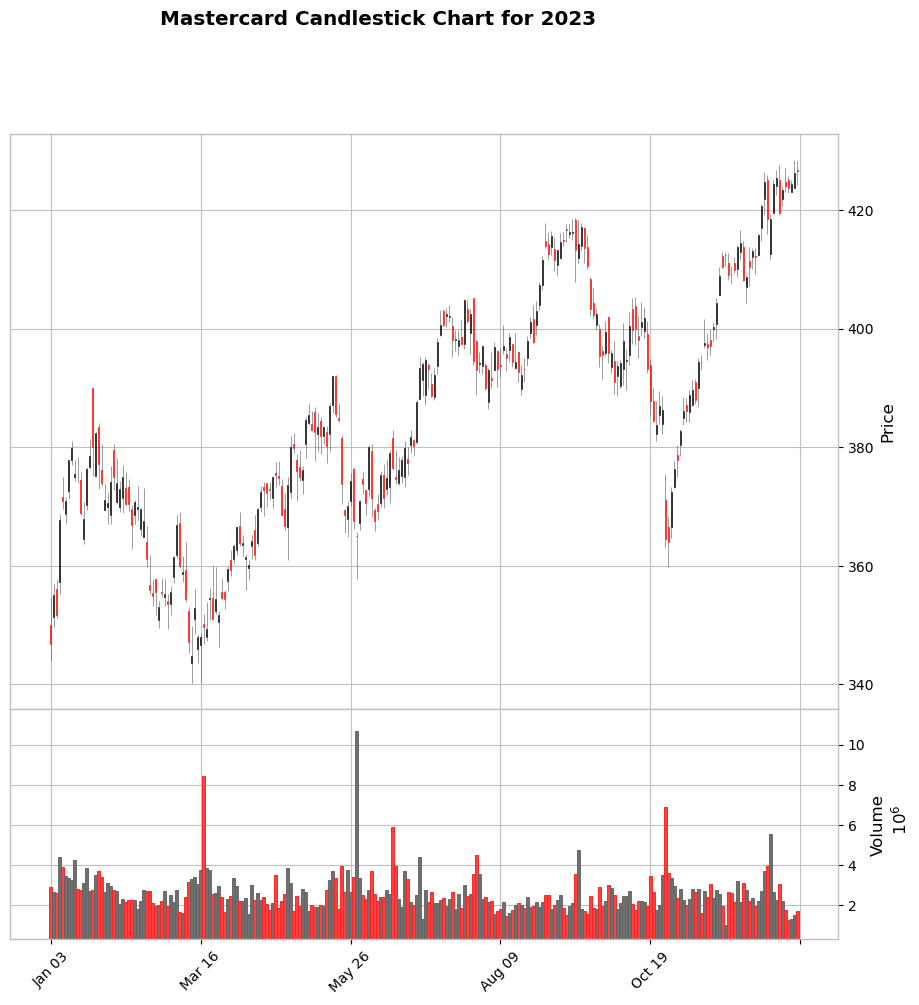

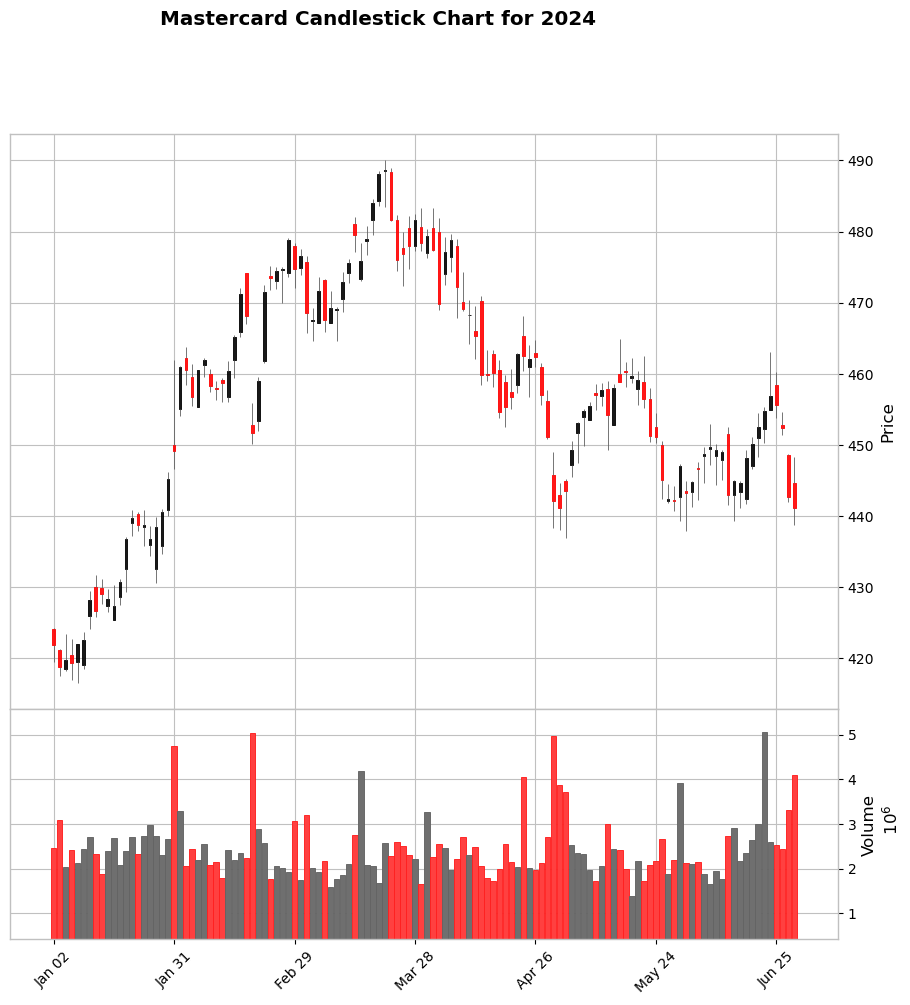

In [212]:
# Group data by year
company_mastercard['Year'] = company_mastercard.index.year

# Get a list of years
years = company_mastercard['Year'].unique()

# Loop by years
# This will create charts by years
for year in years:
    # Get only the data for that year
    yearly_data = company_mastercard[company_mastercard['Year'] == year].copy()
    file_name = f'Mastercard_Candlestick_Chart_{year}.png'
    
    # Plot the data and get a copy of the chart for matplotlib
    fig, ax = mpf.plot(
        yearly_data,
        type='candle',
        volume=True,
        style='checkers',
        title=f'Mastercard Candlestick Chart for {year}',
        ylabel='Price',
        ylabel_lower='Volume',
        figratio=(1, 1),
        figscale=2,
        returnfig = True #sends the data to matplotlib
        #,savefig=file_name
        #mplfinance cannot display the charts and save it at the same time
        #save the chart using matplotlib instead
    )

    # Save the figure using matplotlib
    fig.savefig(file_name)
    
    # Show the figure
    plt.show()

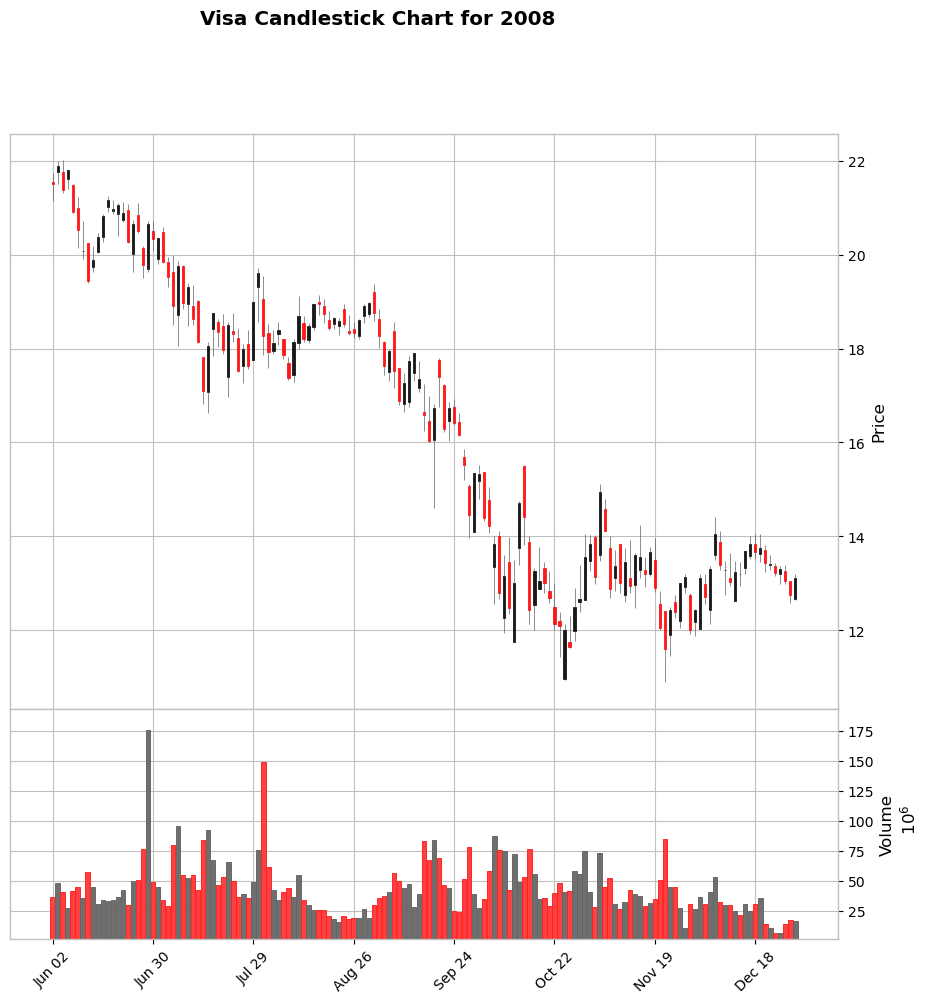

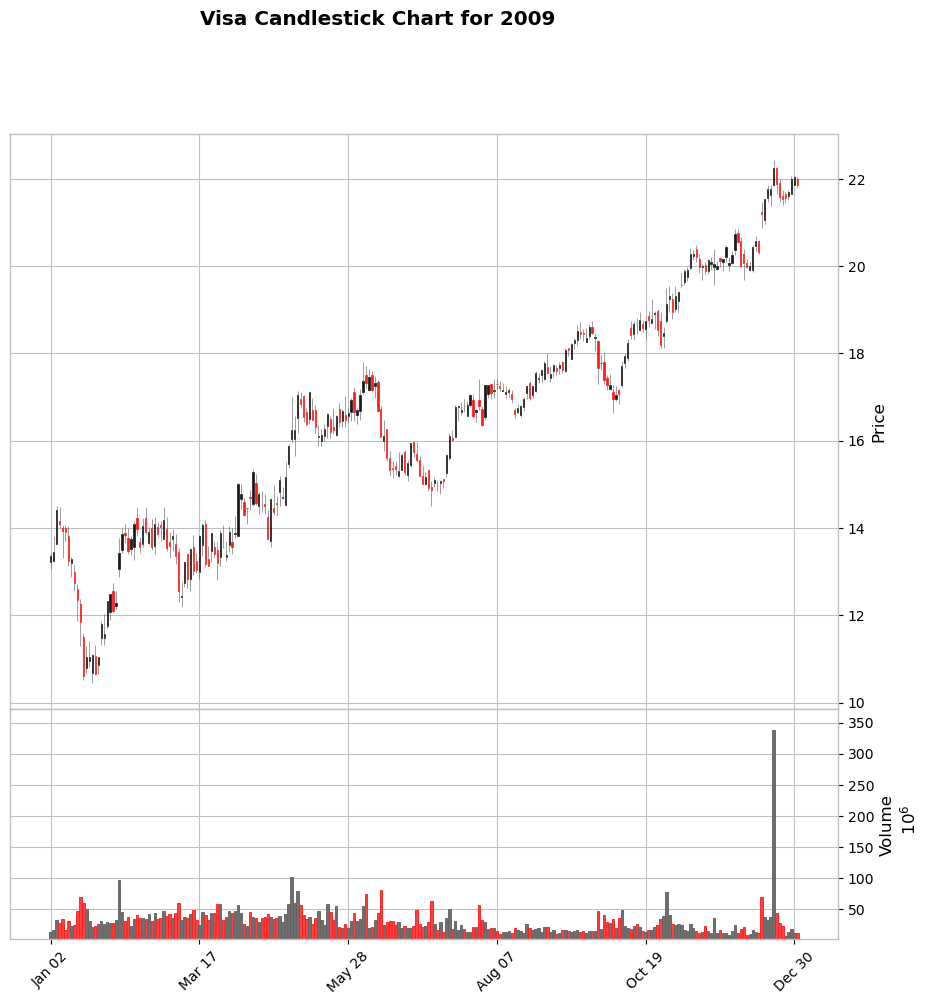

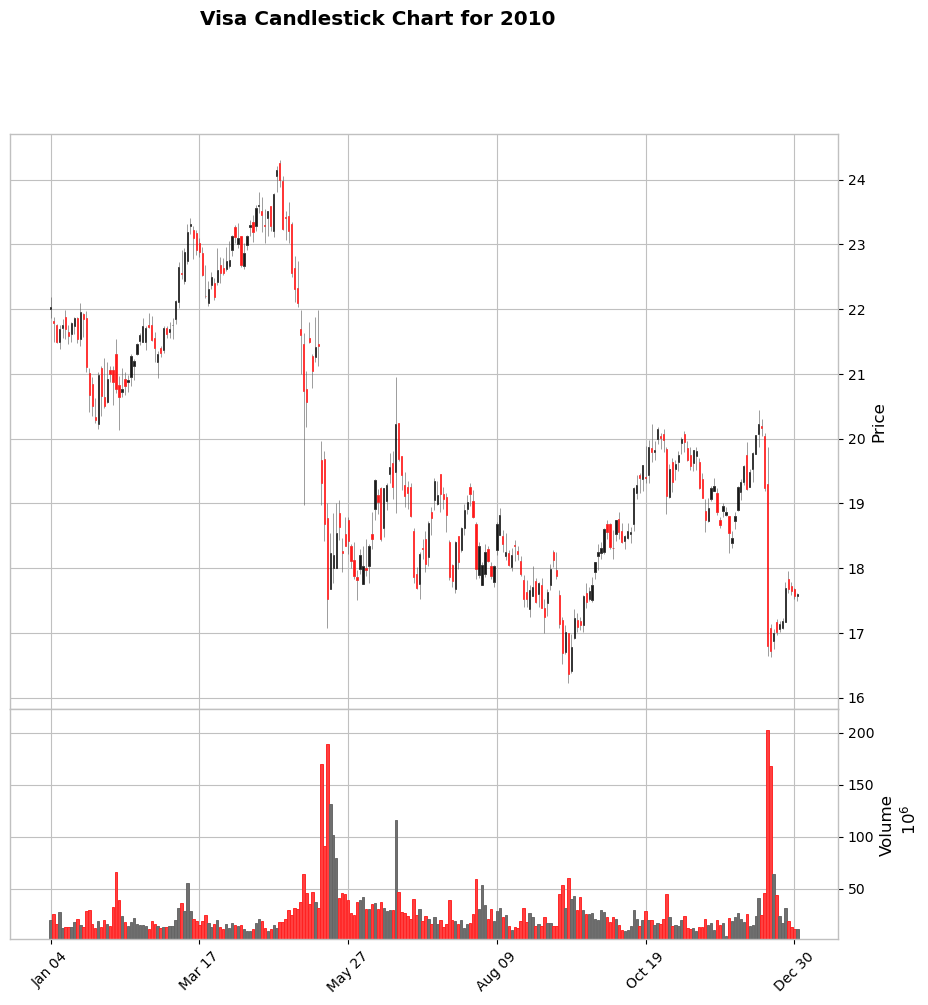

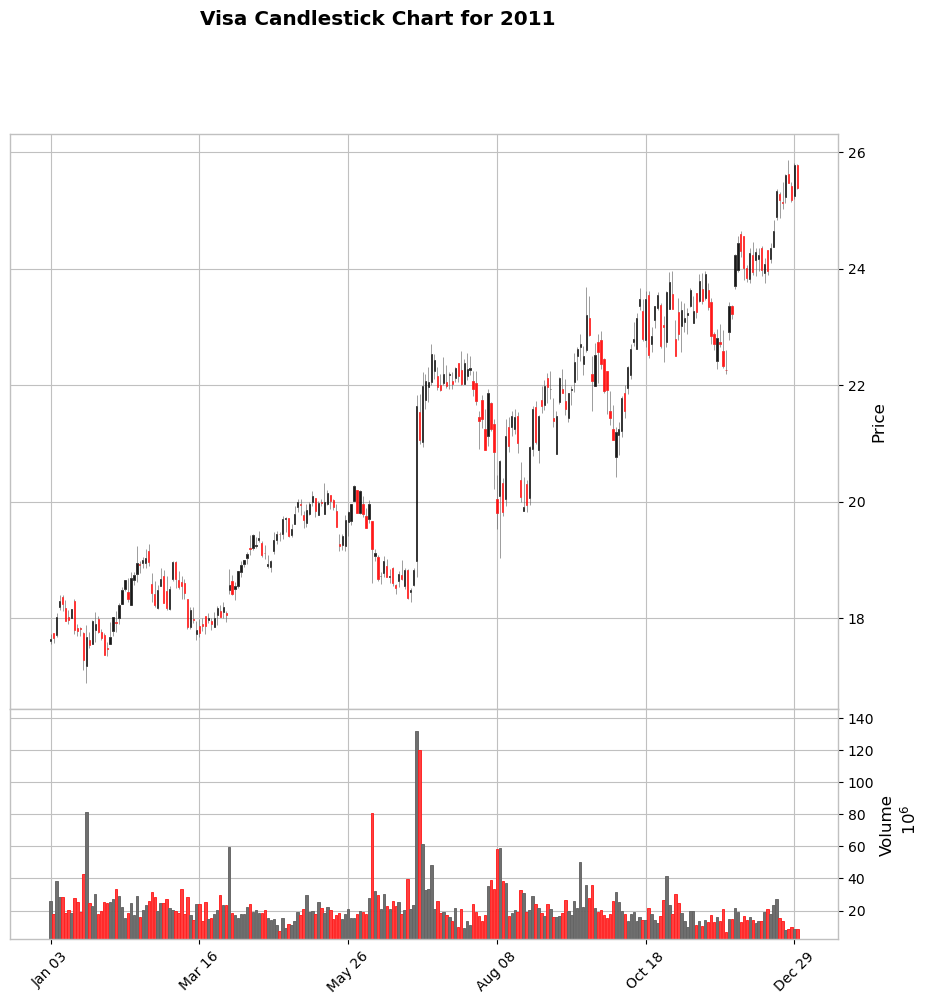

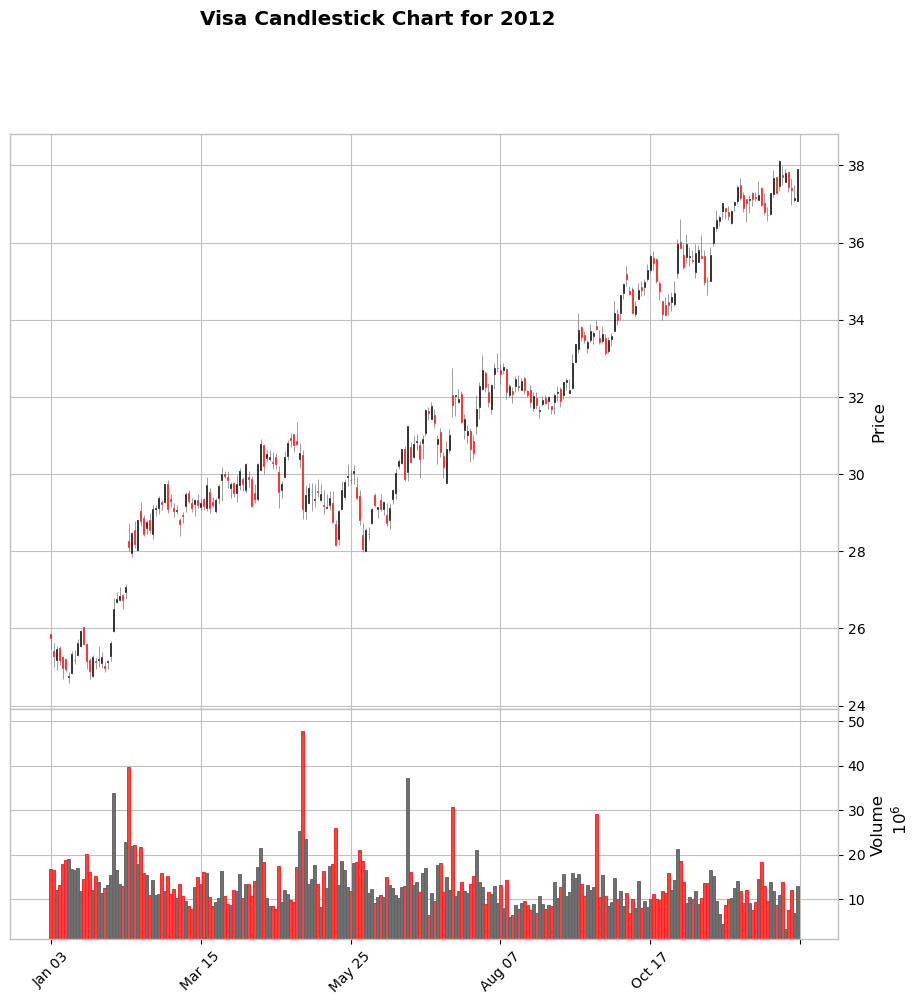

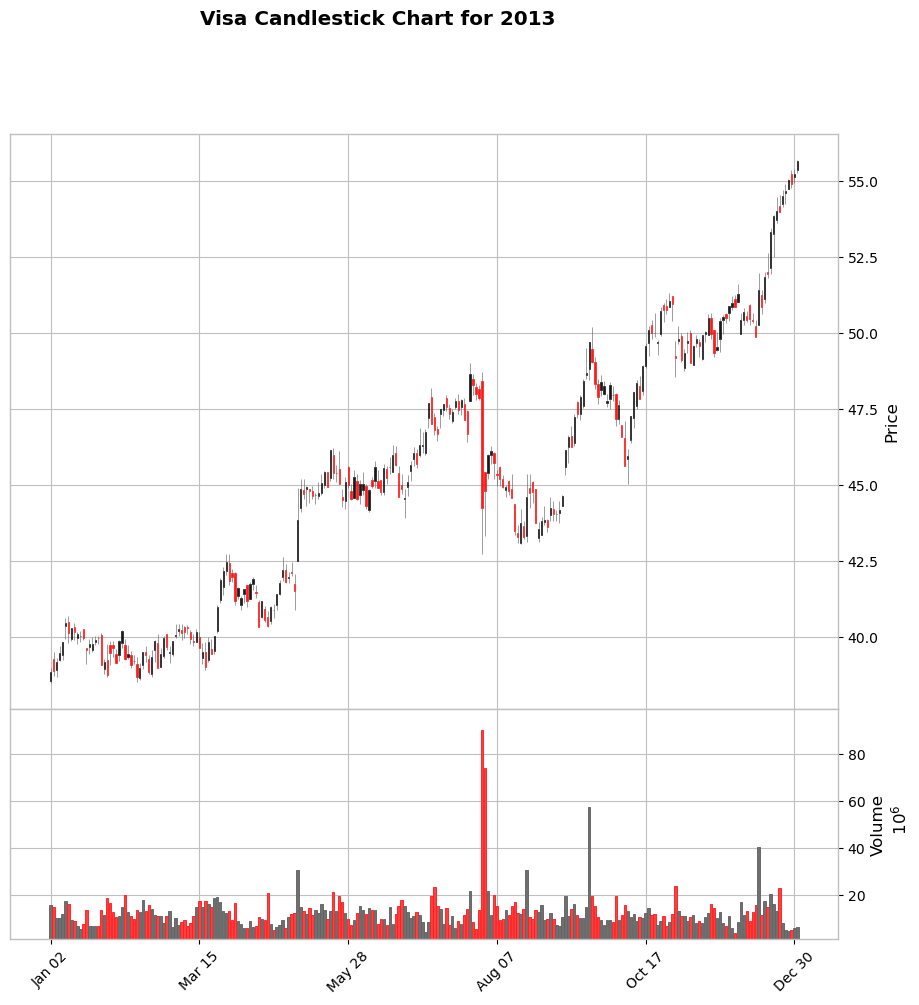

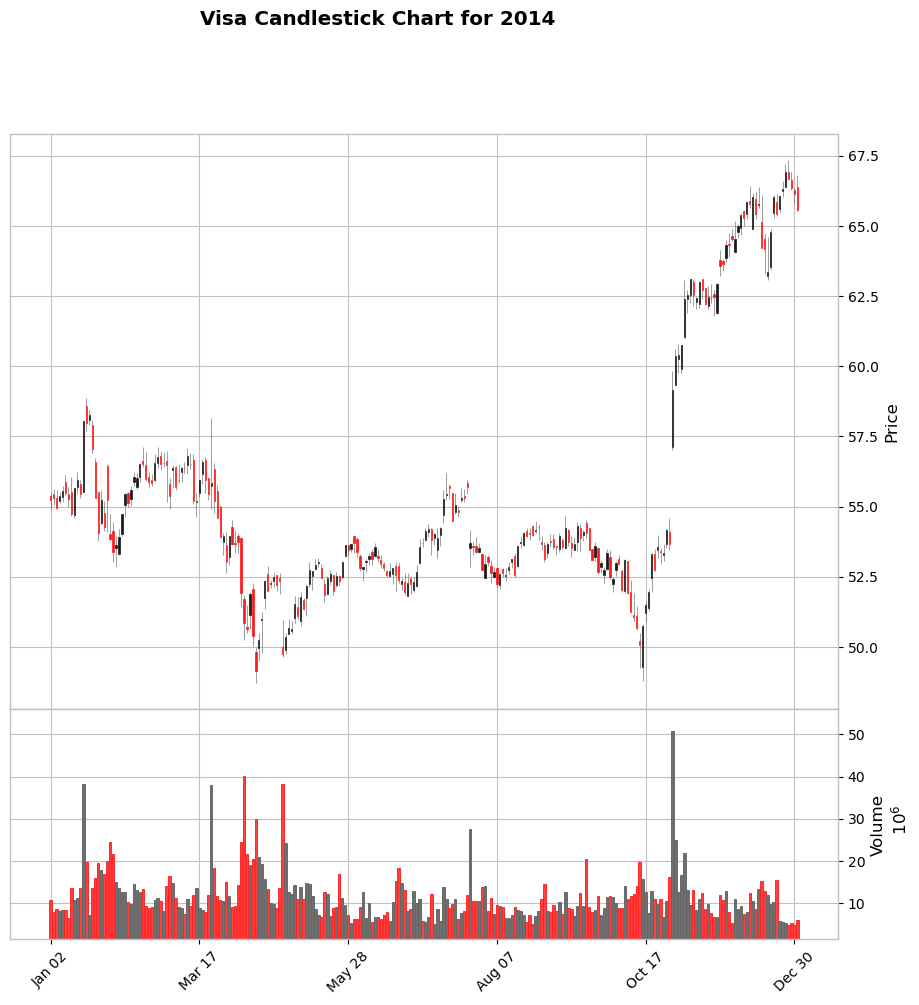

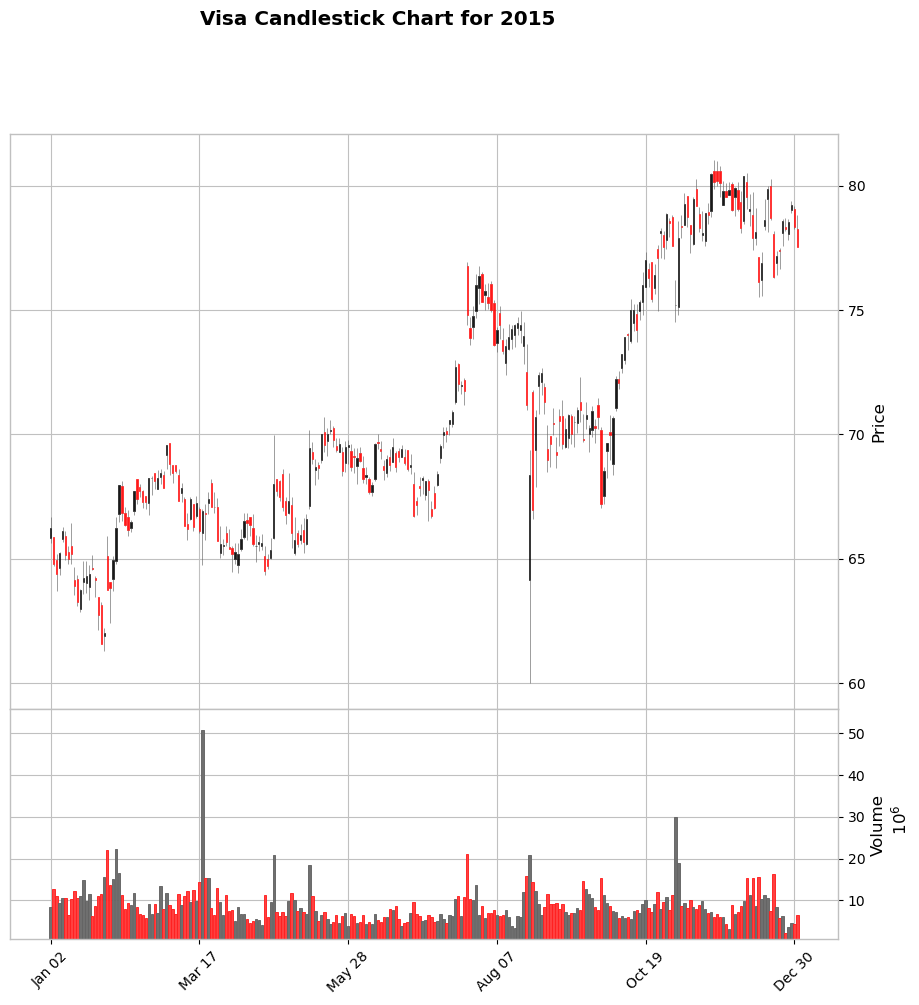

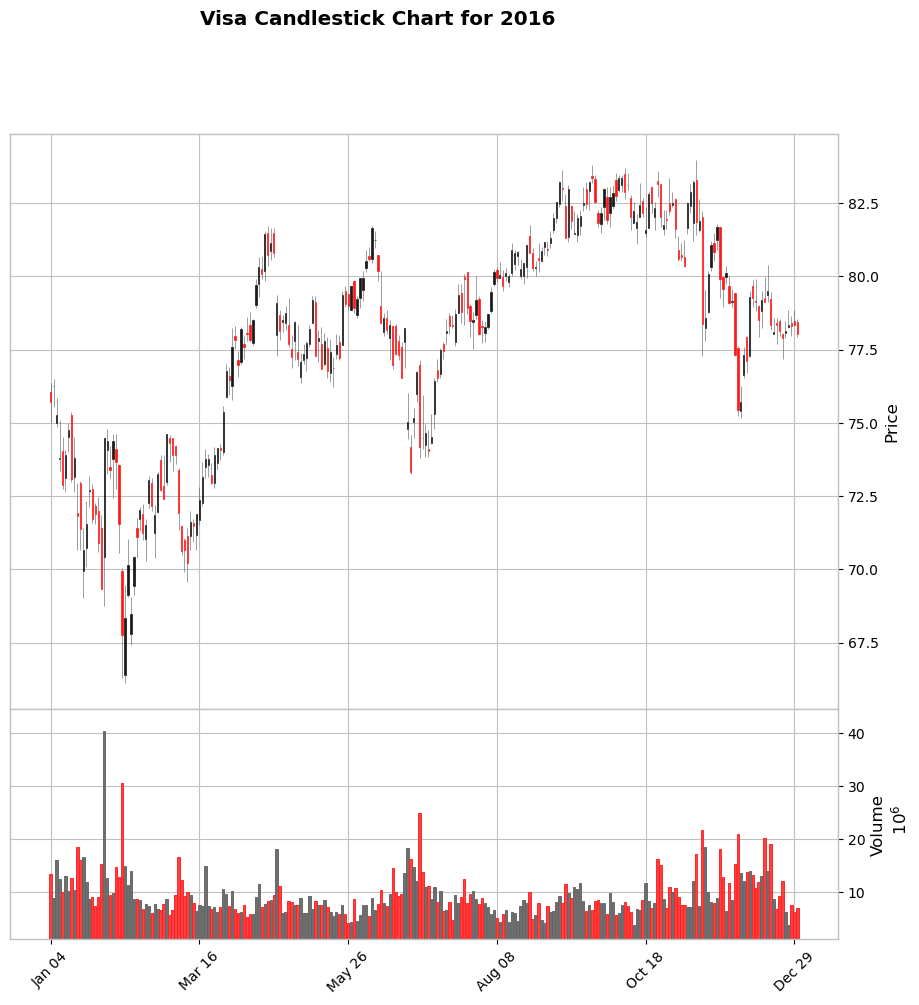

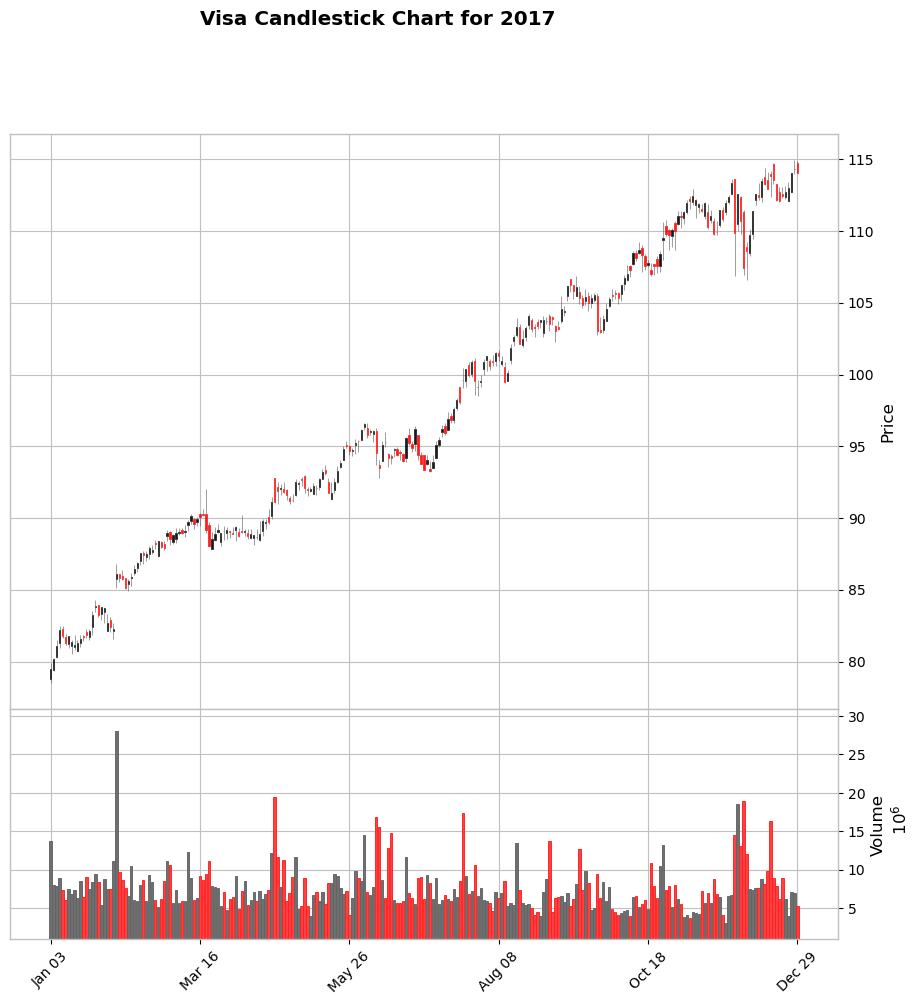

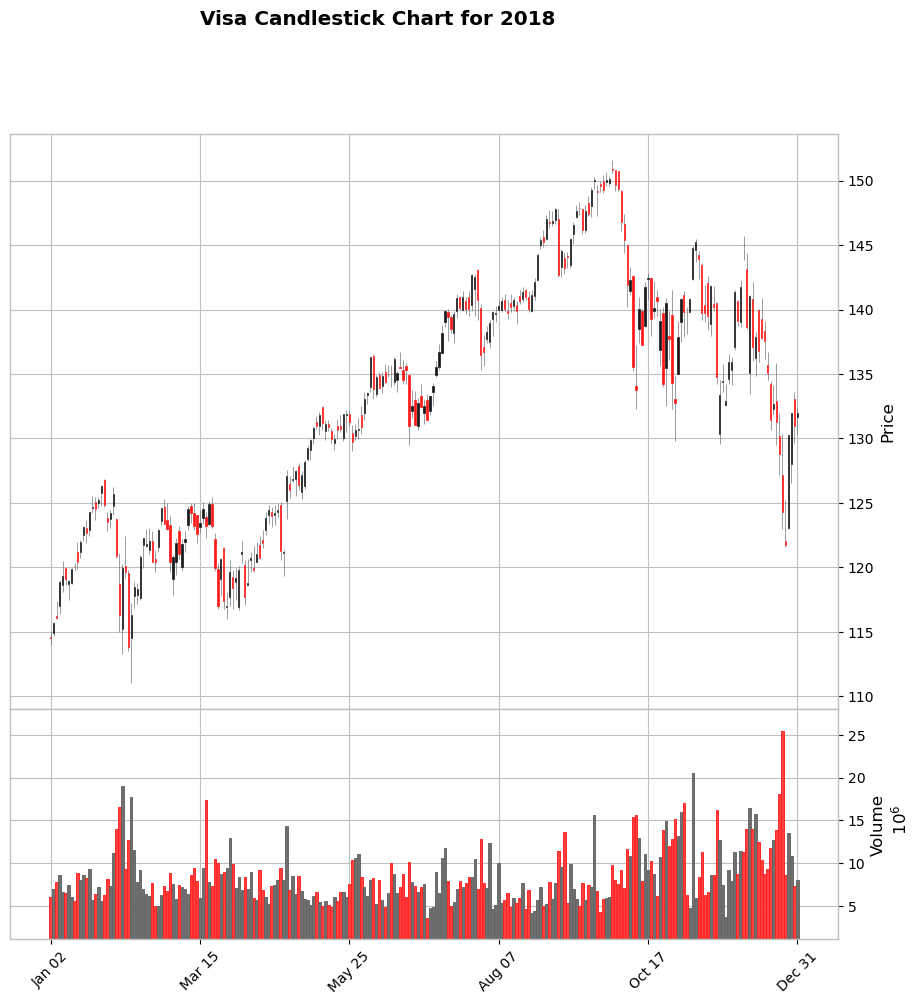

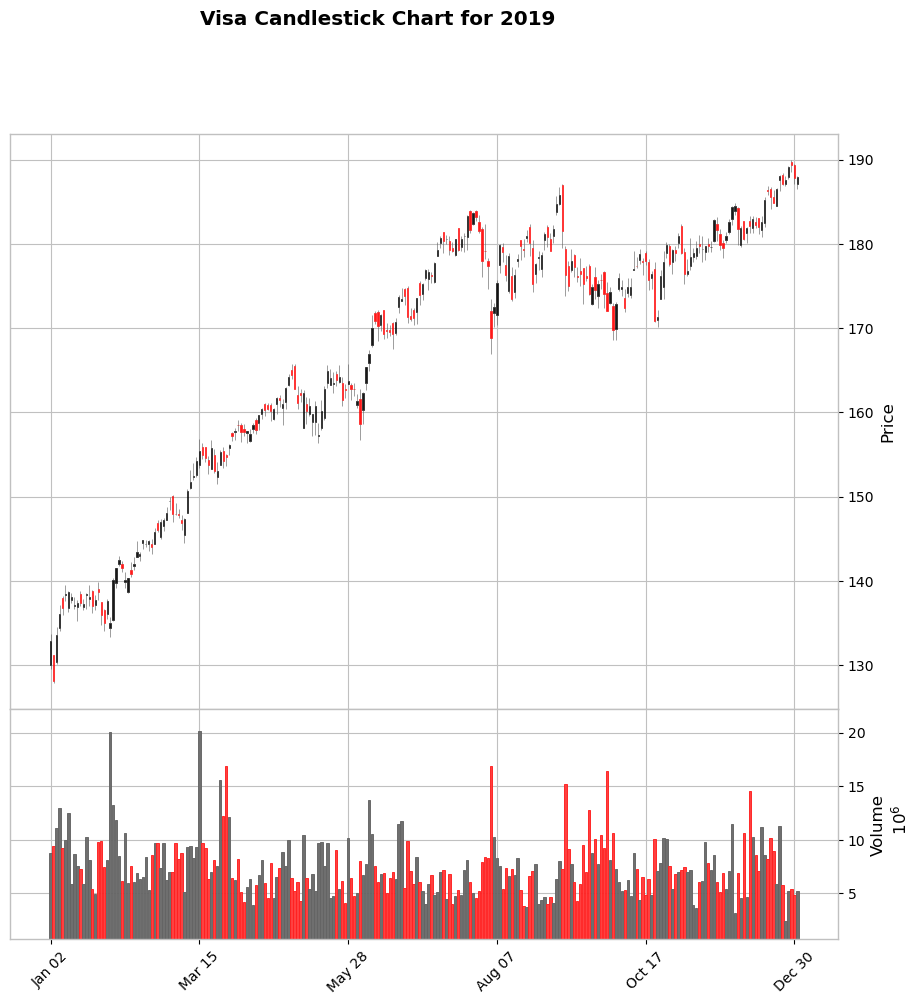

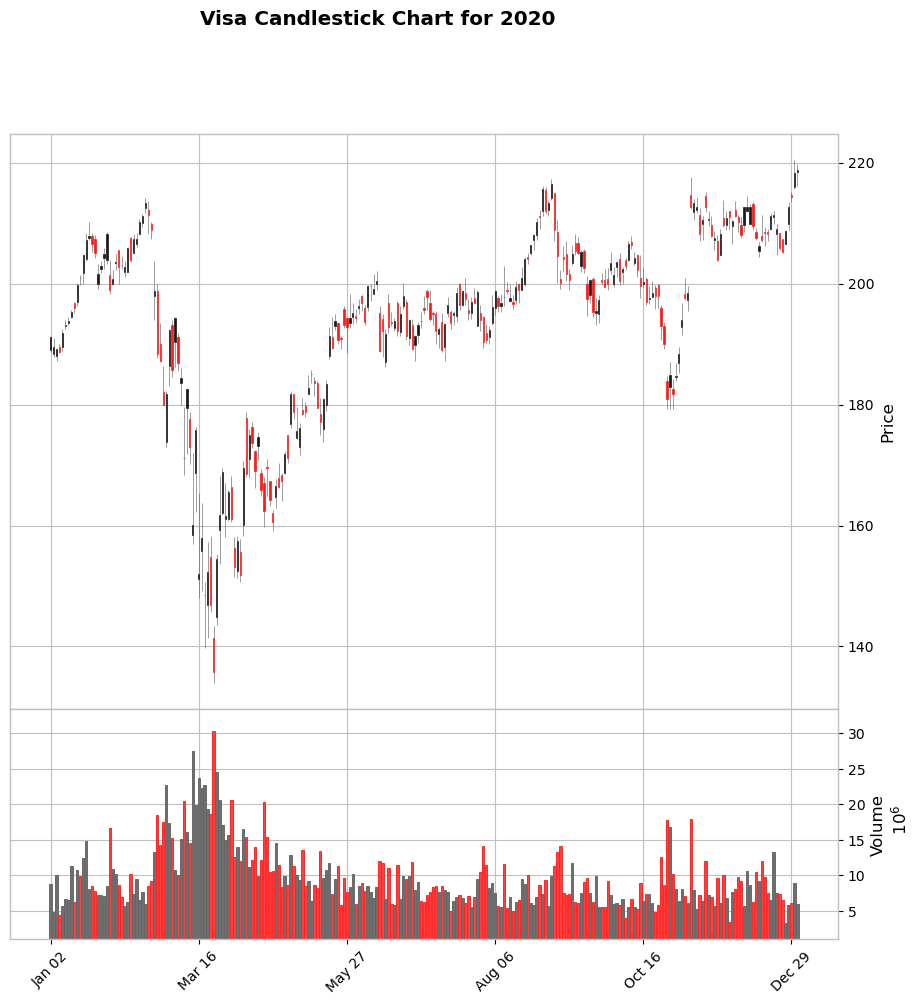

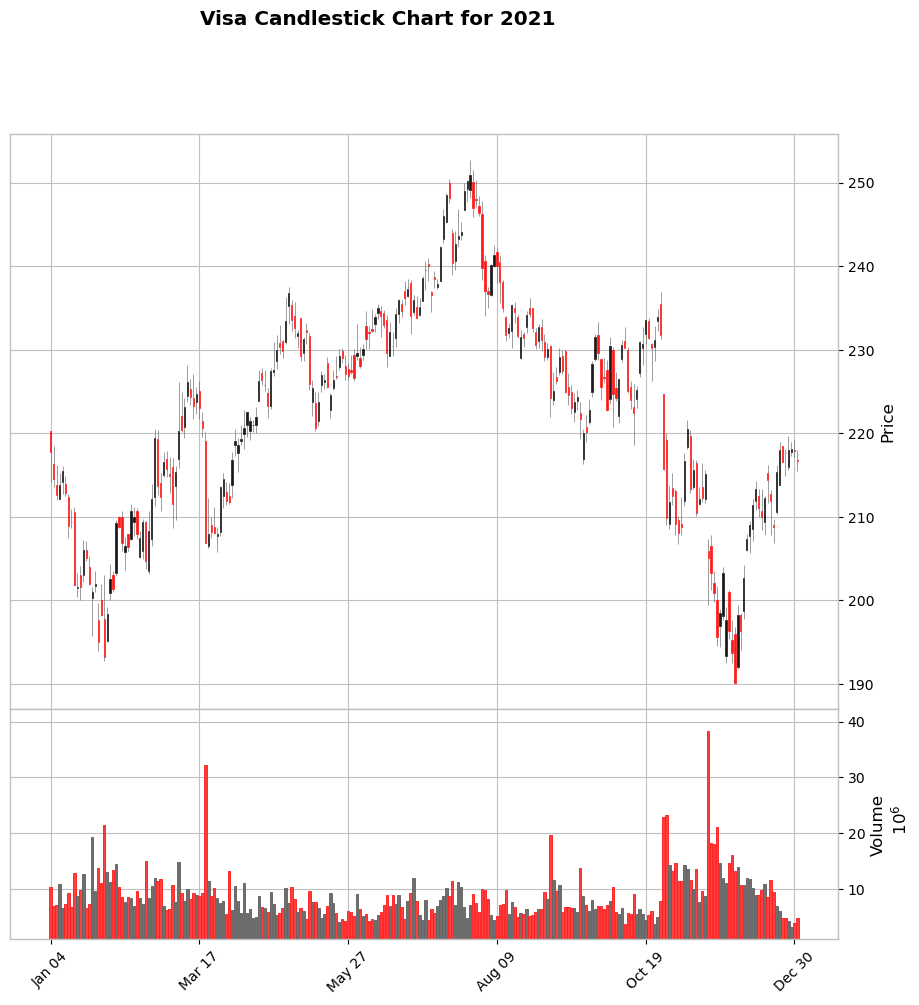

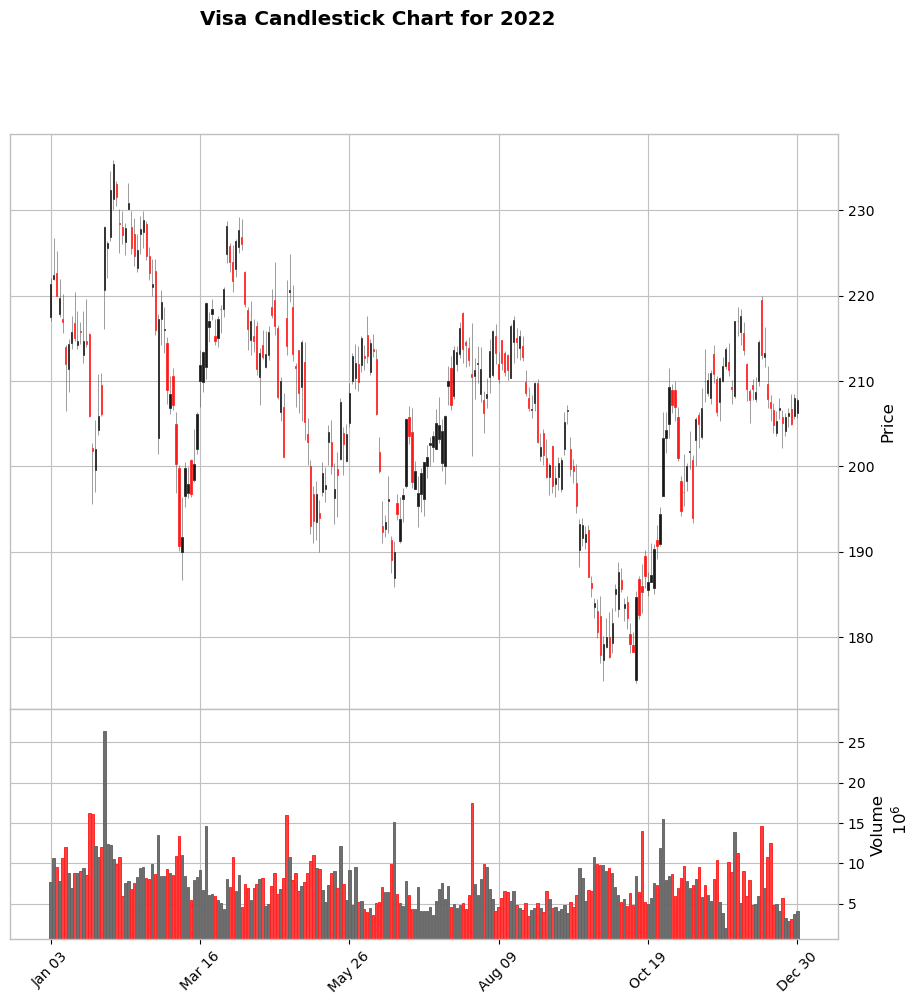

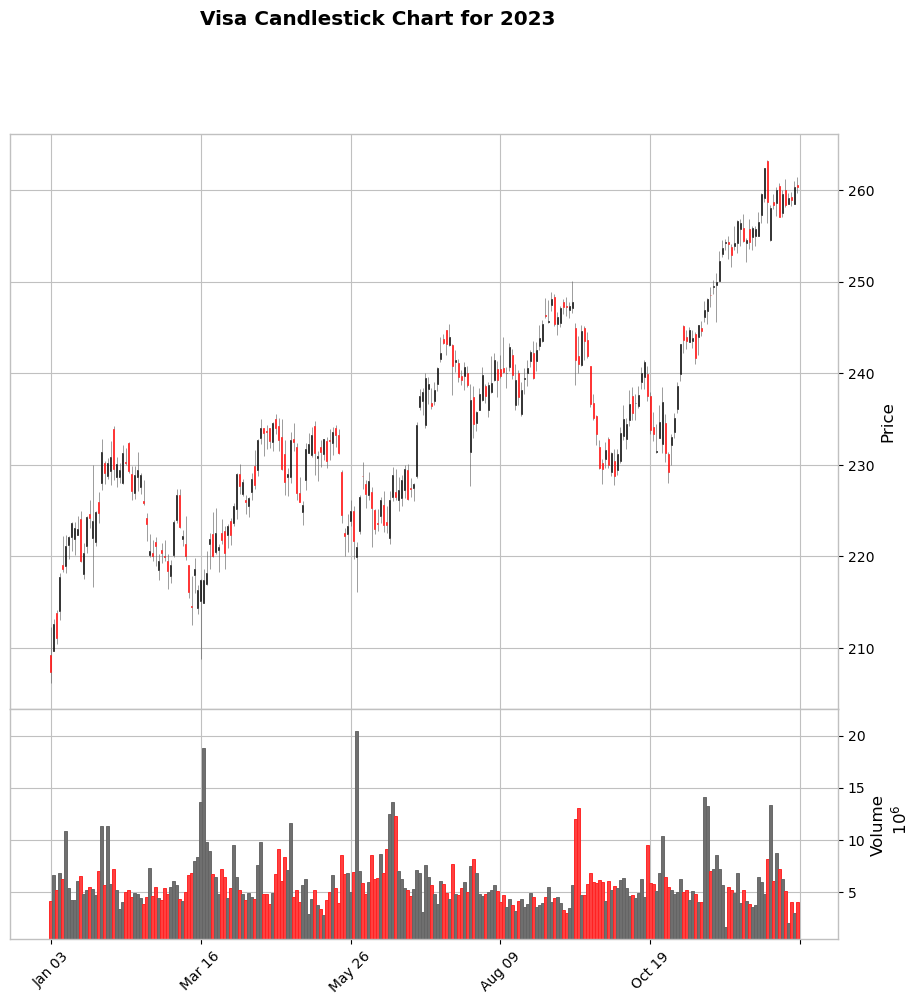

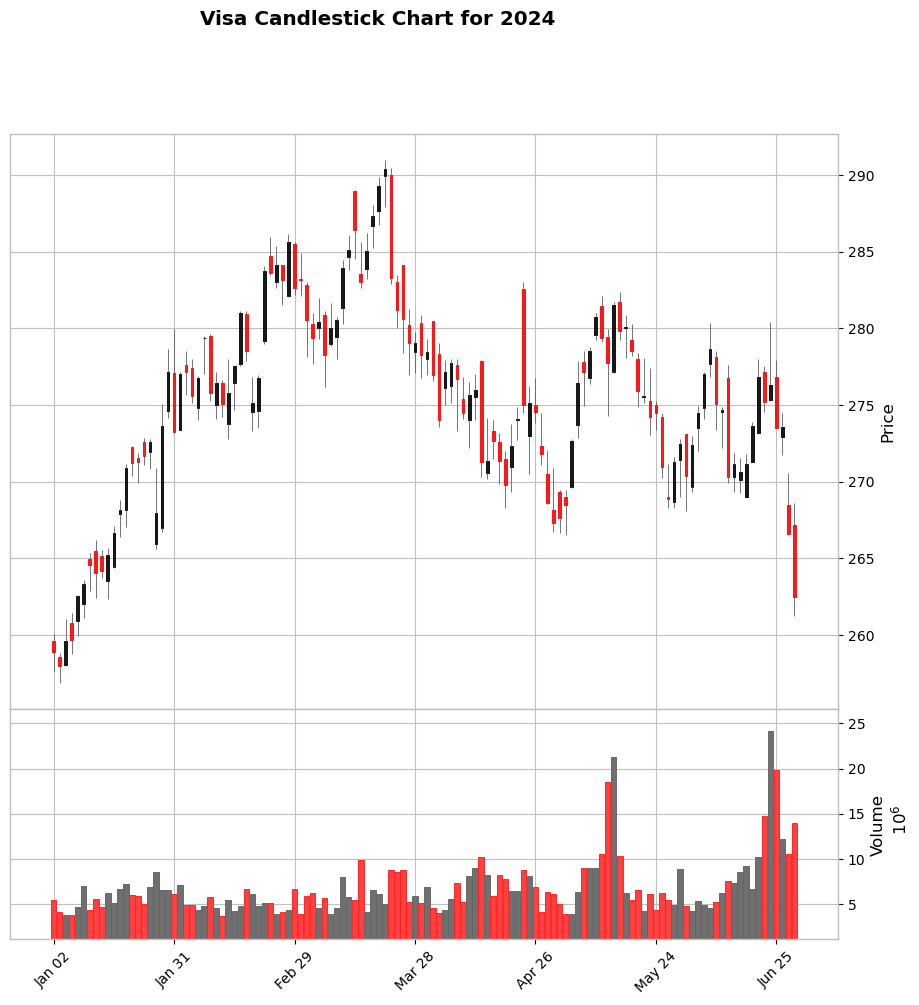

In [214]:
# Group data by year
company_visa['Year'] = company_visa.index.year

# Get a list of years
years = company_visa['Year'].unique()

# Loop by years
# This will create charts by years
for year in years:
    # Get only the data for that year
    yearly_data = company_visa[company_visa['Year'] == year].copy()
    file_name = f'Visa_Candlestick_Chart_{year}.png'
    
    # Plot the data and get a copy for matplotlib
    fig, ax = mpf.plot(
        yearly_data,
        type='candle',
        volume=True,
        style='checkers',
        title=f'Visa Candlestick Chart for {year}',
        ylabel='Price',
        ylabel_lower='Volume',
        figratio=(1, 1),
        figscale=2,
        returnfig=True # Sends the chart to matplotlib
        #,savefig=file_name
        #mplfinance cannot display the charts and save it at the same time
        #save the chart using matplotlib instead
    )
    
    # Save the figure using matplotlib
    fig.savefig(file_name)
    
    # Show the figure
    plt.show()